# We begin by reviewing the methods utilised within this notebook.

## The fundamental underpinning of our analysis constitutes Modern Portfolio Theory.

### It encompossases the following Axioms..

Investors aim to maximize the expected return of a portfolio for a given level of risk.

Portfolios that maximize the expected return for a specified risk level, are considered efficient portfolios.

Portfolio optimization involves choosing the best portfolio from a range of potential portfolios based on certain goals. These goals often include maximizing expected returns and minimizing elements like financial risk, thus creating a multi-objective optimization challenge.

We Max \frac{x' r - R_f}{\sqrt{x' \text{Cov} x}} Subject to our wealth constarint. 

The full details regarding the motivation for this analysis is contained within...

“Mutual Fund Performance”
Journal of Business, 39(1), 119–138,  William F. Sharpe (1966)
Markowitz’s Mean–Variance Model (1952).

Our main concern is reviewing the axioms within this model to determine if strong assumptions are being made, or if they're cohesive with reality. 

Axiom 1 — Investors care only about mean and variance of portfolio returns
Axiom 2 — Investors are risk-averse
Axiom 3 — Returns are jointly normally distributed
Axiom 4 — Investors choose portfolios based on Markowitz diversification
Axiom 5 — Covariances between asset returns are stable
Axiom 6 — Homogeneous expectations

Although plethora of variables exist within the 'information' investors utilise when making decisions, 
Expectations regarding certain variables underpin the majority of their decisions. Which furthermore abstractly can be aggregated to the expected returns and the volatility (Due to an economic announcement, Interest rate changes, articles etc)

Axiom 2 isn't particularly strong, EVERYONE wants to maximise returns and avoid risk at all costs. Although 'risk-free' is impossible it is pursued.

Axiom 3 is a strong and unrealistic axiom, Tail-risk is heavily exhibited in equities especially with large market caps, Due to Boom bust cycles etc
an alternative distribution or possibly an entirely different framework could be utilised however this is the axiom we must work with.

4, 5 and 6 tends to be more unrealistic. 

Axiom 5 is particularly unrealistic. Due to this a decision to utilise GARCH (Which introduces Dynamic properties) was instigated on my part.
Axiom 6 is very strong too. 

To deal with axiom 6 the FAMA-FACTOR FRENCH MODELS will be utilised. (This is showcased in different notebooks currently being worked on).

Our aim is to align our analysis with axioms that aren't particularly strong. ANd coincide with reality the most.
This motivated the use of Fama-French etc

Axiom 6 can be dealt with utilising the black-literman model, Which incorporates hetrogenous (Non-Homogenous) market beliefs.
this coincides more with reality (Which is our ultimate goal with modelling, while ofcourrse accounting for factors such as overfitting).

Now that we have established what axioms are unrealistic / realistic within our model and how to address this...
We begin with outlining the data collection process... 

I collected all the necessary data through Bloomberg and integrated this within the spreadsheet.

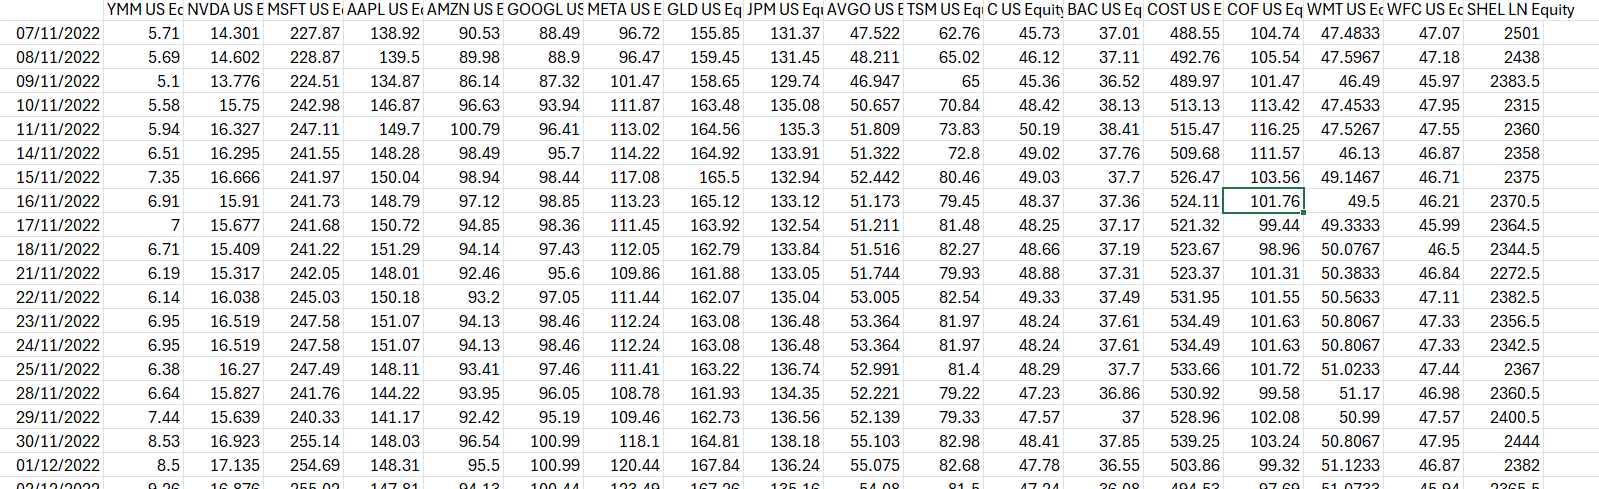

Before we begin the analysis, I have decided to denote the currency in USD.

Now with the aggregated data (PX_Last) we may begin our analysis...

In [111]:
#step 1 import sets of packages criterionically necessary 

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt

In [113]:
# we need to read our csv file to read the price data  and give new column titles to enhance simplicitly, done via pandas package.
data = pd.read_csv(r'C:\Users\andre\OneDrive - University of Essex\Python Data sheet\Portfolio PX_LAST_CSV.csv', header=0)
new_column_names = ['Date', 'NVDA', 'MSFT', 'AAPL', 'AMZN', 'GOOGL', 'META', 'GLD', 'JPM', 'AVGO', 'TSM', 'CITI', 'BAC', 'COST','COF', 'WMT', 'WMC', 'WFC', 'SHELL']
data.columns = new_column_names
data = data.dropna()
data.fillna(0, inplace=True)
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
print (data.columns)

Index(['Date', 'NVDA', 'MSFT', 'AAPL', 'AMZN', 'GOOGL', 'META', 'GLD', 'JPM',
       'AVGO', 'TSM', 'CITI', 'BAC', 'COST', 'COF', 'WMT', 'WMC', 'WFC',
       'SHELL'],
      dtype='object')


In [115]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

print(data.dtypes)

#the purpose of this code is to display results is a sensible way and ensure full conformity with python best priciples (Sensible)

Date     datetime64[ns]
NVDA            float64
MSFT            float64
AAPL            float64
AMZN            float64
GOOGL           float64
META            float64
GLD             float64
JPM             float64
AVGO            float64
TSM             float64
CITI            float64
BAC             float64
COST            float64
COF             float64
WMT             float64
WMC             float64
WFC             float64
SHELL           float64
dtype: object


In [117]:
# Remove any leftover index columns
for col in ['index', 'level_0']:
    if col in data.columns:
        data = data.drop(columns=[col])

rets = np.log(data.drop(columns=['Date']) / data.drop(columns=['Date']).shift(1))

# We need to calculate the log returns, needed for our optimisation code, by using np.log function
# Convert the first column of our csv file to numeric type
data['NVDA'] = pd.to_numeric(data['NVDA'], errors='coerce')
data['MSFT'] = pd.to_numeric(data['MSFT'], errors='coerce')
data['AAPL'] = pd.to_numeric(data['AAPL'], errors='coerce')
data['AMZN'] = pd.to_numeric(data['AMZN'], errors='coerce')
data['GOOGL'] = pd.to_numeric(data['GOOGL'], errors='coerce')
data['META'] = pd.to_numeric(data['META'], errors='coerce')
data['GLD'] = pd.to_numeric(data['GLD'], errors='coerce')
data['JPM'] = pd.to_numeric(data['JPM'], errors='coerce')
data['AVGO'] = pd.to_numeric(data['AVGO'], errors='coerce')
data['TSM'] = pd.to_numeric(data['TSM'], errors='coerce')
data['CITI'] = pd.to_numeric(data['CITI'], errors='coerce')
data['BAC'] = pd.to_numeric(data['BAC'], errors='coerce')
data['COST'] = pd.to_numeric(data['COST'], errors='coerce')
data['COF'] = pd.to_numeric(data['COF'], errors='coerce')
data['WMT'] = pd.to_numeric(data['WMT'], errors='coerce')
data['WMC'] = pd.to_numeric(data['WMC'], errors='coerce')
data['WFC'] = pd.to_numeric(data['WFC'], errors='coerce')
data['SHELL'] = pd.to_numeric(data['SHELL'], errors='coerce')
data.reset_index(inplace=True)  # Set the date column as a normal data column
data.fillna(0, inplace=True)


#finding returns through logarithmic calculation as mentioned earlier 
rets = np.log(data.drop(columns=['Date', 'index']) / data.drop(columns=['Date', 'index']).shift(1))

# we need to convert daily returns to annualised returns (We shall stipualte the axiom that there's 252 trading days per year)
rets.mean() * 252
cov_matrix = np.cov(rets, rowvar=False)

In [119]:
print(rets.mean)

<bound method DataFrame.mean of          NVDA      MSFT      AAPL      AMZN     GOOGL      META       GLD  \
0         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1   -0.003509  0.020829  0.004379  0.004166 -0.006094  0.004623 -0.002588   
2   -0.109470 -0.058231 -0.019234 -0.033753 -0.043614 -0.017933  0.050531   
3    0.089948  0.133912  0.079059  0.085236  0.114915  0.073077  0.097574   
4    0.062520  0.035980  0.016854  0.019085  0.042150  0.025954  0.010227   
..        ...       ...       ...       ...       ...       ...       ...   
777 -0.027909  0.029458 -0.000960  0.002599  0.004570  0.026199  0.000306   
778 -0.007101 -0.020248 -0.029591  0.006284 -0.032839  0.024855 -0.120302   
779  0.028874 -0.001973 -0.015236 -0.003802  0.091526 -0.001031 -0.027564   
780  0.006135  0.021448 -0.001507 -0.004894  0.039265  0.008957 -0.016547   
781 -0.038181 -0.040393 -0.005236  0.003673 -0.018597 -0.022023 -0.016427   

          JPM      AVGO       TSM      CITI

In [121]:
#Define the risk free rate
# This value determination was reached utilising AVG(3 month treasury yields) over the same time interval.
risk_free_rate = 0.04828

def statistics(weights, rets, risk_free_rate):
    """
    Returns portfolio statistics.

    Parameters
    ==========
    weights : array-like
        Weights for different securities in the portfolio, including the risk-free asset.
    rets : DataFrame
        Daily returns of the assets.
    risk_free_rate : float
        Annual risk-free rate as a decimal.

    Returns
    =======
    pret : float
        Expected portfolio return.
    pvol : float

  Expected portfolio volatility.
    sharpe_ratio : float
        Sharpe ratio using the specified risk-free rate.
    """

    # Separate the risk-free weight from the risky asset weights by making 2 seperate arrays, one including and excluding the risk free weight
    risk_free_weight = weights[-1]
    risky_weights = weights[:-1]

    # Calculate expected portfolio return (annualised), risk free weight is included in the returns
    pret = np.sum(rets.mean() * risky_weights) * 252 + risk_free_weight * risk_free_rate

    # Calculate expected portfolio volatility (annualised), the risk free weight is not included the volatility
    pvol = np.sqrt(np.dot(risky_weights.T, np.dot(rets.cov() * 252, risky_weights)))

    # Calculate Sharpe ratio using the risk-free rate
    sharpe_ratio = (pret - risk_free_rate) / pvol

    return np.array([pret, pvol, sharpe_ratio])

In [123]:
from scipy.optimize import minimize

# number of assets being optimised
n_assets = rets.shape[1]

# our initial guess of weights, assume equal weights. This needs to be done for the optimisation function to proceed
init_weights = np.repeat(1/n_assets, n_assets)

# Setting Weight Constraints, weights cant be below 0 or greater than 1 and all weights must aggregate upto 1
bounds = tuple((0, 1) for asset in range(n_assets))
total_weights_constraint = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

# Define the function, maximize the Sharpe ratio.
def neg_sharpe_ratio(weights, rets, risk_free_rate):
    stats = statistics(np.append(weights, [1 - sum(weights)]), rets, risk_free_rate)
    return -stats[2]  # Minimizing the negative Sharpe ratio is equivalent to maximizing the Sharpe ratio.

# Solving the optimisation Problem
optimized = minimize(neg_sharpe_ratio, init_weights, args=(rets, risk_free_rate), method='SLSQP', bounds=bounds, constraints=total_weights_constraint)

# Optimal weighting of our assets
opt_weights = optimized.x


# Displauing the key Portfolio Statistics
portfolio_stats = statistics(np.append(opt_weights, [1 - sum(opt_weights)]), rets, risk_free_rate)
print(f"Optimal weighting: {opt_weights}")
print(f"Expected annualized rate of return: {portfolio_stats[0]:.2%}")
print(f"Expected annualized volatility: {portfolio_stats[1]:.2%}")
print(f"Sharpe ratio: {portfolio_stats[2]:.2f}")

# Calculating the covariance matrix
cov_matrix = rets.cov() * 252
print("\nCovariance matrix:")
print(cov_matrix)

Optimal weighting: [6.63191738e-17 1.16281330e-01 1.01181870e-16 3.55963048e-16
 2.80902583e-16 1.36024378e-16 1.17883173e-01 4.88902683e-01
 9.91716267e-02 1.14024153e-02 5.98833472e-17 2.52936138e-17
 7.91546920e-17 3.69615817e-17 3.18139639e-16 1.66358771e-01
 4.58903481e-17 7.84785090e-17]
Expected annualized rate of return: 37.89%
Expected annualized volatility: 14.01%
Sharpe ratio: 2.36

Covariance matrix:
           NVDA      MSFT      AAPL      AMZN     GOOGL      META       GLD  \
NVDA   0.252451  0.048264  0.021100  0.026891  0.037766  0.031656  0.035241   
MSFT   0.048264  0.250197  0.067243  0.055050  0.081403  0.065130  0.088679   
AAPL   0.021100  0.067243  0.055017  0.033012  0.048602  0.038334  0.053487   
AMZN   0.026891  0.055050  0.033012  0.068712  0.042437  0.039004  0.043741   
GOOGL  0.037766  0.081403  0.048602  0.042437  0.104803  0.056823  0.075802   
META   0.031656  0.065130  0.038334  0.039004  0.056823  0.089288  0.057853   
GLD    0.035241  0.088679  0.05

In [129]:
opt_weights = np.array(opt_weights) #take the optimal weights output as the input in array form
opt_weights_pct = opt_weights / opt_weights.sum() * 100 # convert to % form

print("Optimal weighting:")
for i, weight in enumerate(opt_weights_pct):
    print(f"{i+1}. {weight:.2f}%")

Optimal weighting:
1. 0.00%
2. 11.63%
3. 0.00%
4. 0.00%
5. 0.00%
6. 0.00%
7. 11.79%
8. 48.89%
9. 9.92%
10. 1.14%
11. 0.00%
12. 0.00%
13. 0.00%
14. 0.00%
15. 0.00%
16. 16.64%
17. 0.00%
18. 0.00%


1. res['x'] — Optimal Portfolio Weights

res is the result object returned by scipy.optimize.minimize.
The attribute res['x'] contains the optimal weights for the portfolio that the optimisation algorithm found. (Within our relative definition of algorithms).

These weights:

correspond to the allocation for each risky asset

are the solution to the optimisation problem

maximise the Sharpe ratio, which was defined earlier as the objective of the optimisation task. (Bound by our axioms).

To explain it in PLAIN ENGLISH... It gives the best combination of asset weights that maximises risk-adjusted return.

statistics(weights, rets, risk_free_rate) — Portfolio Metrics Function
This function usually returns a tuple:
(return, volatility, sharpe_ratio)
Each value is computed using the portfolio weights, the asset returns, and the covariance matrix of returns.

statistics(x)[0] — Expected Annualised Return

This represents the expected annual return of the portfolio, including:

weighted returns from the risky assets

plus the contribution from the risk-free asset (if included in weights ofcourse).

statistics(x)[2] — Sharpe Ratio

The Sharpe ratio measures excess return per unit of risk.
The optimisation algorithm maximises this Sharpe ratio, which is why the values derived from statistics(x) are central to the optimisation problem.

# Our Results

Our optimal weighing array at the end in percentage form illustrates how much of our funds we should invest in each asset i.e. the most is 48.89% of our funds in JPM.

we can expect an average return of 37.89% from our portfolio per year, based on historial data.

Our portfolio’s value is expected to flucrtuate over a yea by 14.01%

Keep in mind the higher the sharpe ratio the better the risk-adjusted return...
Sharpe ratio: 2.36 , This is fairly high and although it may seem promising it could be a direct result of overfitting.

# VaR Index

Value-at-Risk (VaR) measures the maximum expected loss of a portfolio over a specified time horizon at a chosen confidence level, answering the fundamental question of... 

“With X% confidence, how much could I lose over this period?” It is one of the most widely used tools in financial risk management because it summarises potential losses into a single, intuitive figure

Keep in mind this directly correpsonds to our buisness need of Minimising risk. (An Axiom but not partiuclarly strong).

VaR can be calculated using different methods, each relying on different assumptions about how returns behave. To Directly address our axioms to better fit reality we will utilisie a specific form of VaR that is deemed to be the less (Axiomatically strong). The Variance–Covariance (or parametric) method is the simplest approach; it assumes returns follow a normal distribution and computes VaR directly from the portfolio’s mean return and standard deviation. Although computationally efficient, this method cannot capture more complex features such as fat tails or path-dependent behaviour. In contrast, Monte Carlo simulation provides a more flexible and realistic way to estimate VaR. 

Instead of assuming normally distributed returns, it simulates a large number of possible future price paths—often using models such as Geometric Brownian Motion—and calculates the portfolio value for each scenario. This approach accommodates non-normal return distributions and more complex market dynamics, allowing for a more accurate and robust estimate of potential losses. 

### Utilising a GBM Monet carlo simulation instead of the more simplistic variance-covariance method directly instigates an axiom more sound with reality.

The Monte Carlo VaR process consists of three main steps. First, we generate scenarios by using estimates of volatility and correlations for the assets in the portfolio. These inputs allow us to simulate a large number of possible future price paths, typically using models such as Geometric Brownian Motion (GBM). Second, we compute the portfolio value for each simulated path, producing a distribution of potential outcomes. 

Finally, we determine the VaR at a chosen confidence level by identifying the loss corresponding to the appropriate percentile of the simulated return distribution. This entire procedure depends heavily on distributional assumptions, which is why normality tests are essential. 

Many financial models—including GBM—assume that asset returns follow a normal distribution. If this assumption is violated, VaR estimates can become inaccurate, potentially leading to the underestimation or overestimation of risk and therefore poor decision-making. Normality tests help assess whether the data resemble a normal distribution by examining characteristics such as skewness and identifying outliers.


The GBM formula used in the code is:

S_t = S_{t-1} \times \exp \left( \left( r - \frac{1}{2} \sigma^2 \right) \times dt + \sigma \times \sqrt{dt} \times Z_t \right)

where:

( S_t ) is the simulated price at time ( t ).
( S_{t-1} ) is the simulated price at the previous time step.
( r ) is the risk-free rate.
( \sigma ) is the volatility of the asset.
( dt ) is the length of the time interval.
( Z_t ) is a random variable from the standard normal distribution.

The function generates I simulated price paths over M time steps, using random shocks from a standard normal distribution to model the uncertainty in price movements.

Statistics for NVDA:
Statistics of the simulated prices:
Mean: 13.21
Median: 13.20
Standard Deviation: 0.42
Minimum: 11.71
Maximum: 14.77


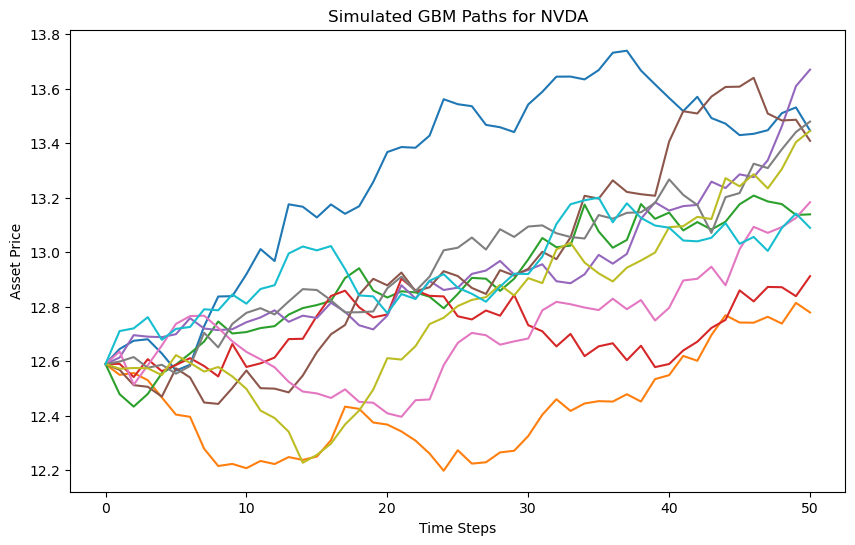

Statistics for MSFT:
Statistics of the simulated prices:
Mean: 208.55
Median: 208.41
Standard Deviation: 6.51
Minimum: 181.15
Maximum: 234.34


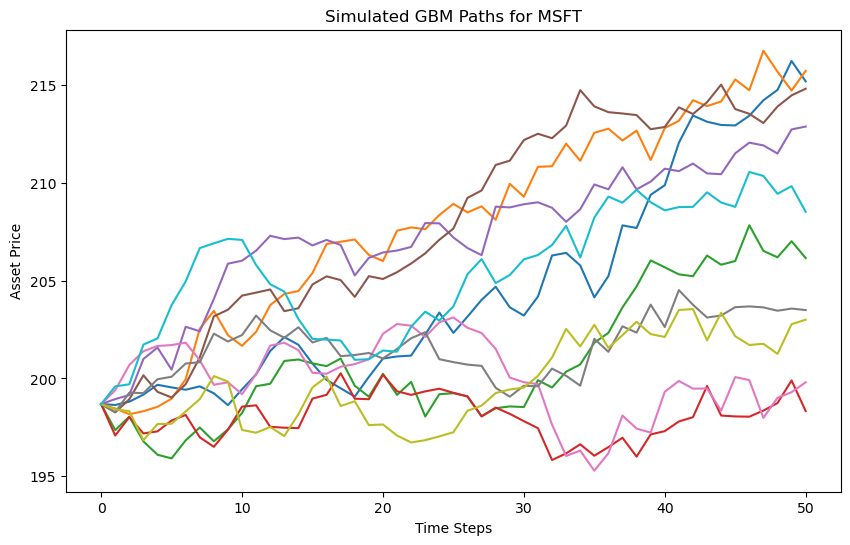

Statistics for AAPL:
Statistics of the simulated prices:
Mean: 539.95
Median: 539.86
Standard Deviation: 7.94
Minimum: 503.65
Maximum: 572.52


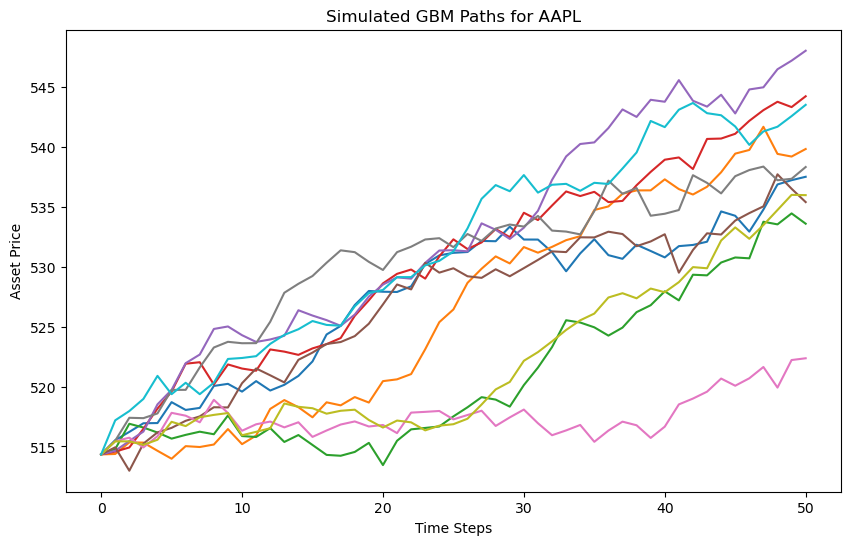

Statistics for AMZN:
Statistics of the simulated prices:
Mean: 283.36
Median: 283.35
Standard Deviation: 4.69
Minimum: 265.37
Maximum: 302.47


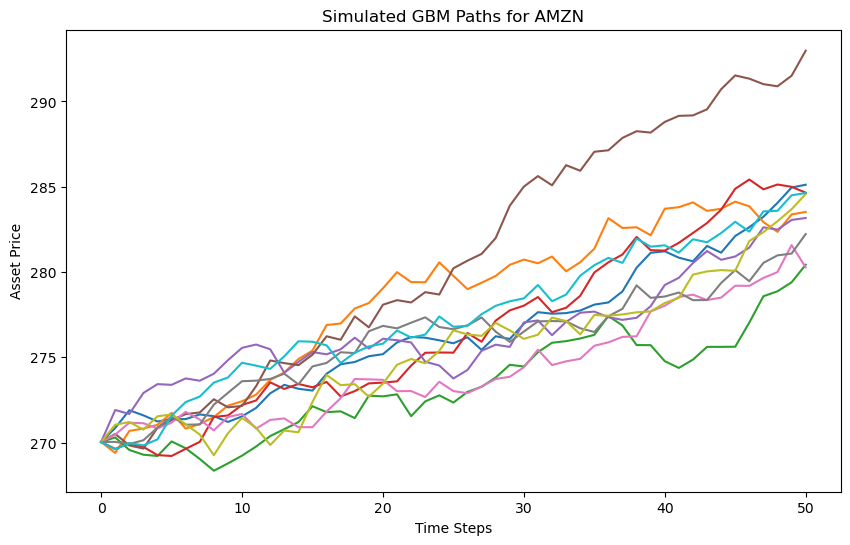

Statistics for GOOGL:
Statistics of the simulated prices:
Mean: 261.62
Median: 261.54
Standard Deviation: 5.31
Minimum: 243.41
Maximum: 281.66


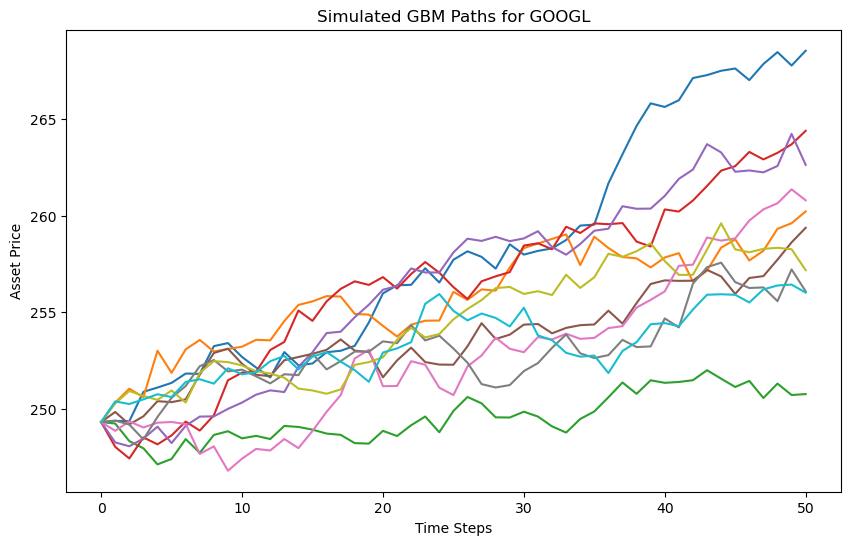

Statistics for META:
Statistics of the simulated prices:
Mean: 291.24
Median: 291.25
Standard Deviation: 5.43
Minimum: 269.63
Maximum: 314.65


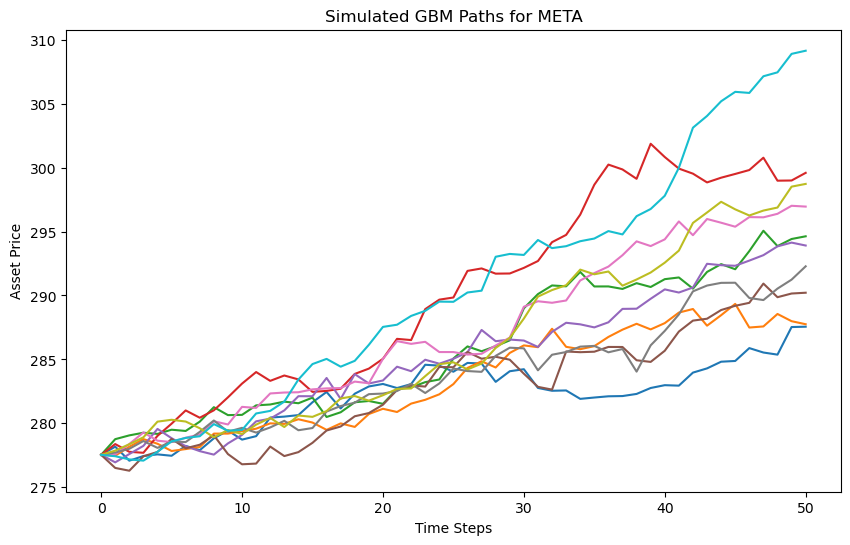

Statistics for GLD:
Statistics of the simulated prices:
Mean: 658.17
Median: 657.90
Standard Deviation: 15.68
Minimum: 598.76
Maximum: 721.41


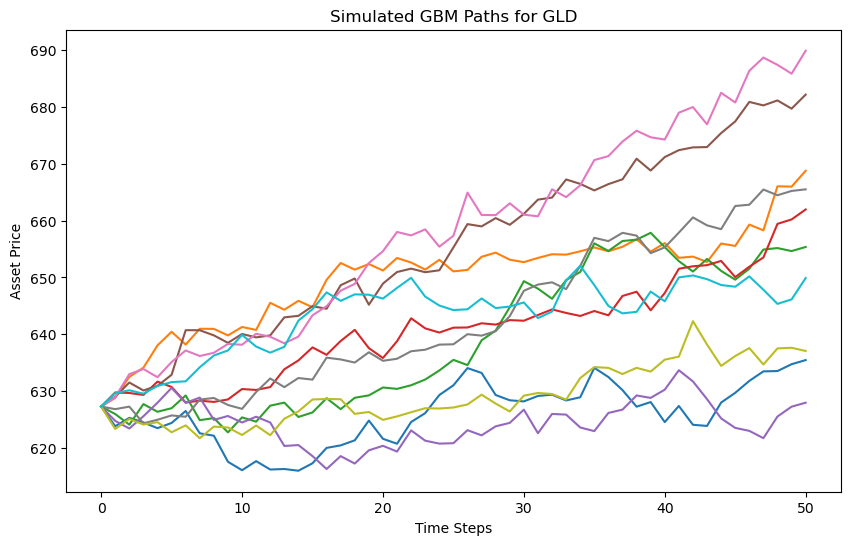

Statistics for JPM:
Statistics of the simulated prices:
Mean: 380.18
Median: 380.16
Standard Deviation: 3.80
Minimum: 364.07
Maximum: 395.51


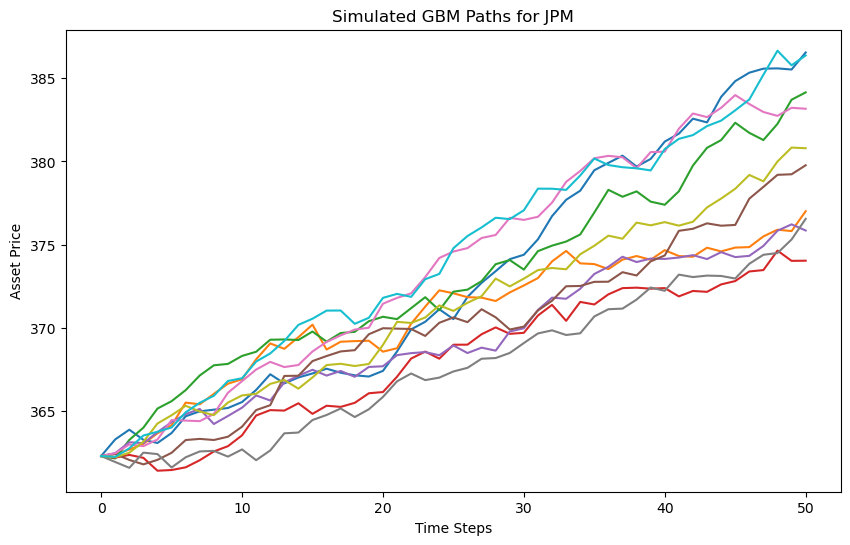

Statistics for AVGO:
Statistics of the simulated prices:
Mean: 324.54
Median: 324.54
Standard Deviation: 4.59
Minimum: 306.61
Maximum: 340.13


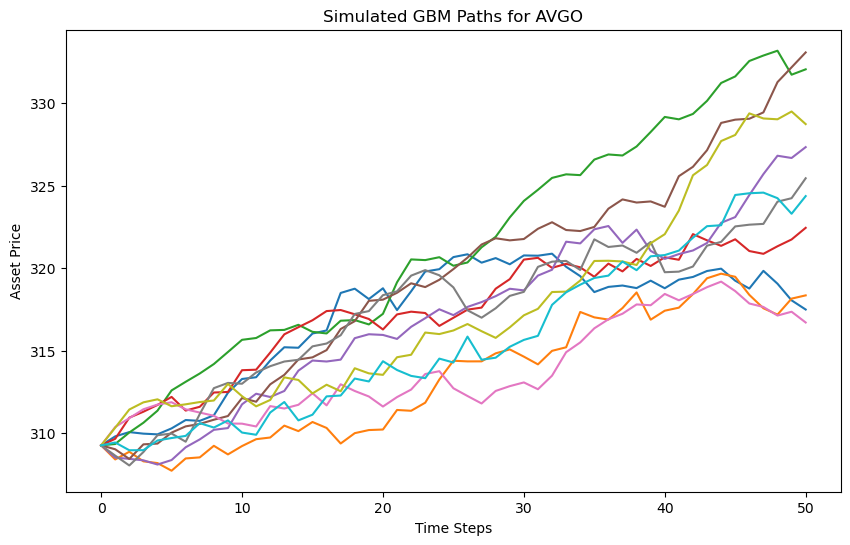

Statistics for TSM:
Statistics of the simulated prices:
Mean: 369.41
Median: 369.29
Standard Deviation: 10.54
Minimum: 333.52
Maximum: 409.37


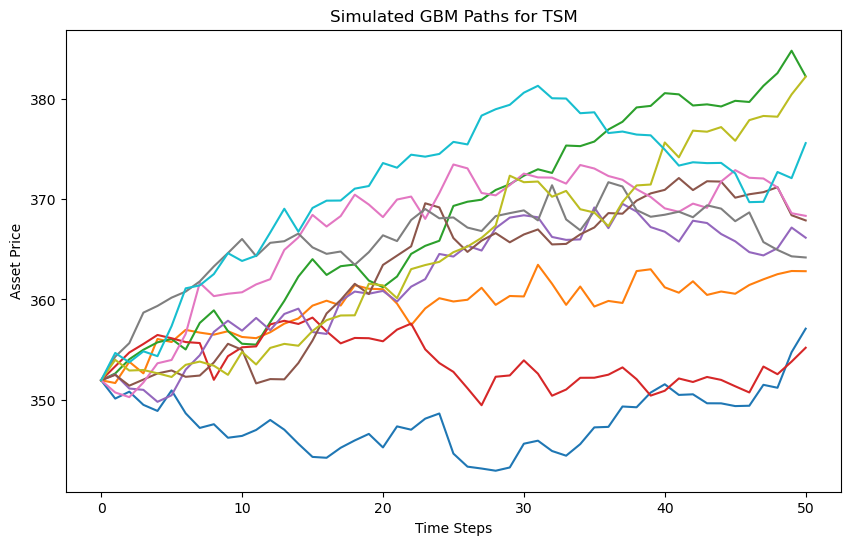

Statistics for CITI:
Statistics of the simulated prices:
Mean: 308.65
Median: 308.57
Standard Deviation: 7.28
Minimum: 282.08
Maximum: 338.11


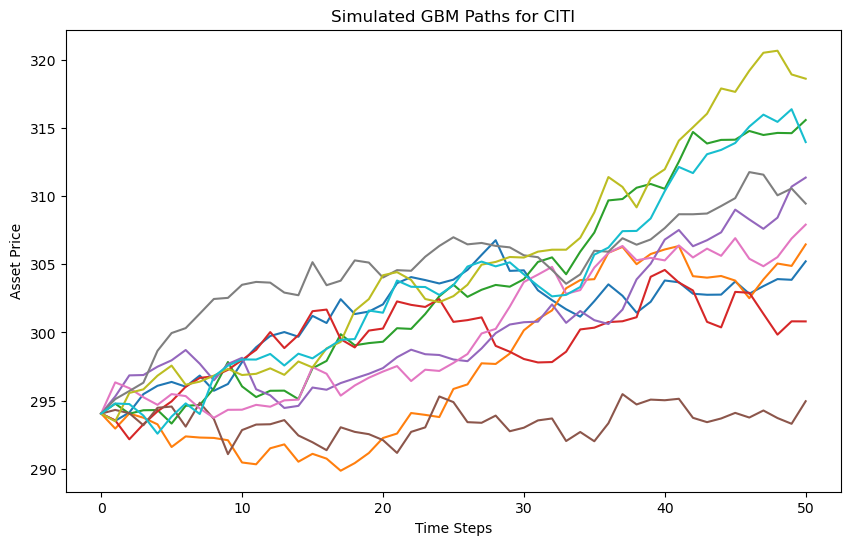

Statistics for BAC:
Statistics of the simulated prices:
Mean: 106.02
Median: 106.01
Standard Deviation: 1.86
Minimum: 99.65
Maximum: 112.32


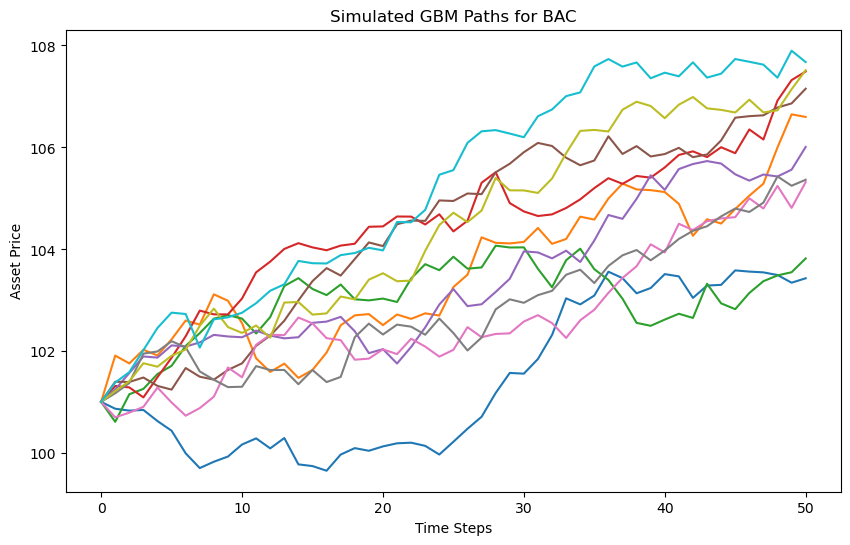

Statistics for COST:
Statistics of the simulated prices:
Mean: 56.19
Median: 56.18
Standard Deviation: 0.91
Minimum: 52.86
Maximum: 59.73


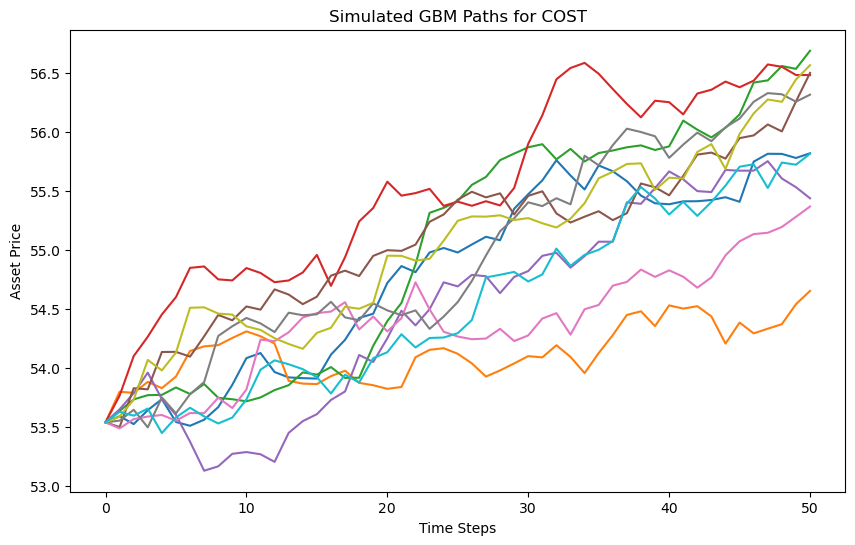

Statistics for COF:
Statistics of the simulated prices:
Mean: 987.23
Median: 987.08
Standard Deviation: 12.42
Minimum: 937.73
Maximum: 1033.81


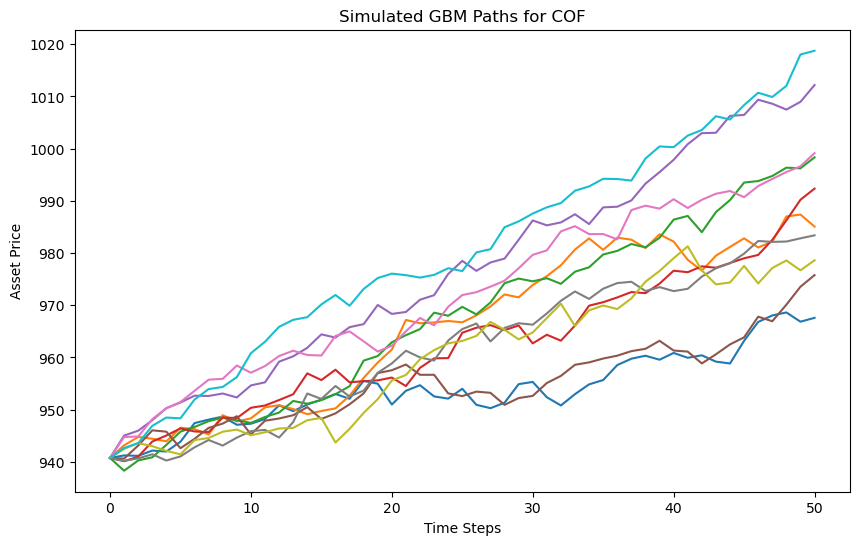

Statistics for WMT:
Statistics of the simulated prices:
Mean: 231.61
Median: 231.60
Standard Deviation: 4.86
Minimum: 213.89
Maximum: 250.99


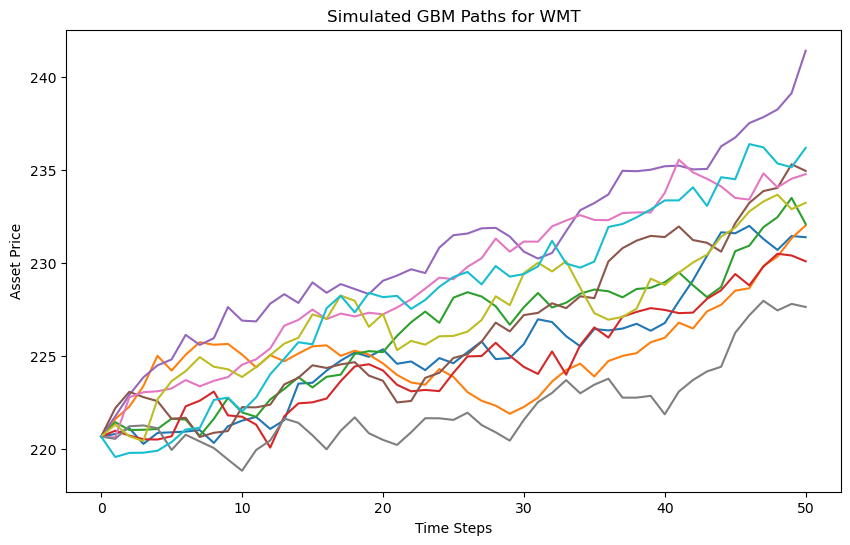

Statistics for WMC:
Statistics of the simulated prices:
Mean: 107.33
Median: 107.31
Standard Deviation: 1.31
Minimum: 102.73
Maximum: 112.46


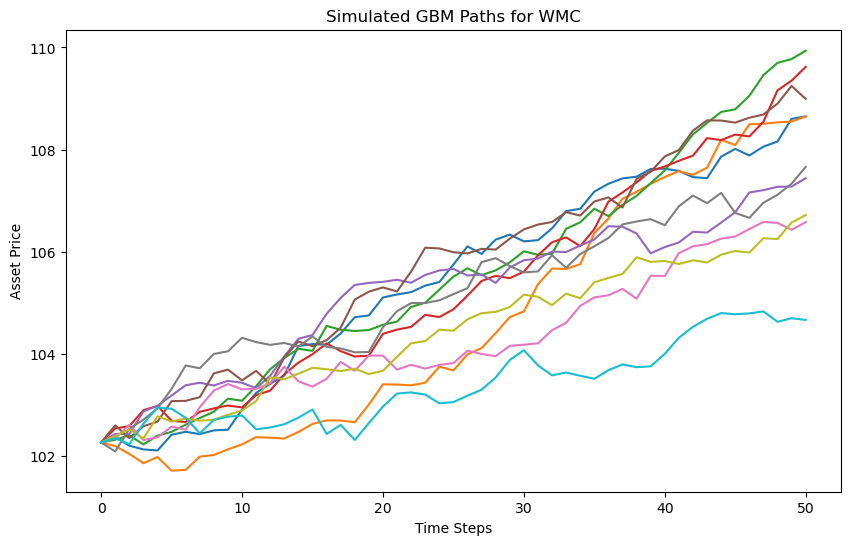

Statistics for WFC:
Statistics of the simulated prices:
Mean: 91.42
Median: 91.40
Standard Deviation: 1.63
Minimum: 85.75
Maximum: 97.44


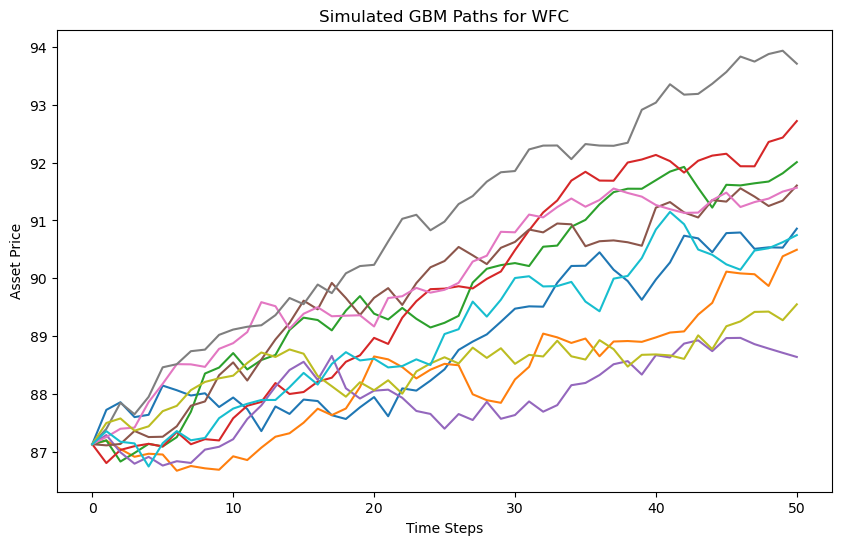

Statistics for SHELL:
Statistics of the simulated prices:
Mean: 2978.72
Median: 2978.23
Standard Deviation: 38.68
Minimum: 2832.74
Maximum: 3131.68


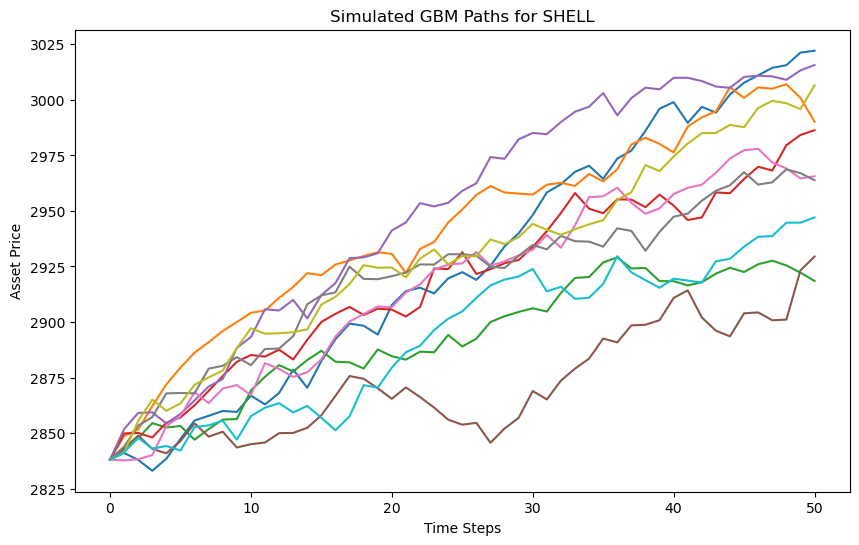

In [127]:
import numpy as np
import pandas as pd

# GBM simulation function
def simulate_gbm(S0, T, r, sigma, I, M=50): #r: The risk-free rate, representing the time value of money.
    dt = T / M  # Length of time interval
    S = np.zeros((M + 1, I))  # Array to store the simulation results
    S[0] = S0  # Set initial value, S0: The initial stock price or portfolio value at time zero.

    for t in range(1, M + 1):
        z = np.random.standard_normal(I)  # Random numbers for simulation
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
    return S

# Function to print statistics of simulation results
def print_statistics(array):
    print("Statistics of the simulated prices:")
    print(f"Mean: {np.mean(array):.2f}")
    print(f"Median: {np.median(array):.2f}")
    print(f"Standard Deviation: {np.std(array):.2f}")
    print(f"Minimum: {np.min(array):.2f}")
    print(f"Maximum: {np.max(array):.2f}")

# Function to plot simulated GBM paths
def plot_gbm_simulation(simulation, asset_name, num_paths=10):
    """
    Plots simulated GBM paths for an asset.

    Parameters:
    simulation : numpy.ndarray
        Array of simulated asset price paths
    asset_name : str
        Name of the asset
    num_paths : int
        Number of paths to plot
    """
    plt.figure(figsize=(10, 6))
    for i in range(num_paths):
        plt.plot(simulation[:, i], lw=1.5)
    plt.title(f'Simulated GBM Paths for {asset_name}')
    plt.xlabel('Time Steps')
    plt.ylabel('Asset Price')
    plt.show()
    


# Number of simulations and time steps
I = 10000  # Number of simulations, I: The number of simulation iterations or paths.
M = 50  # Number of time steps, M: The number of time intervals for the simulation, defaulting to 50 if not provided.
T = 1.0  # Time horizon (1 year), T: The total time horizon for the simulation.

# Risk-free rate from my code
risk_free_rate = 0.04828  

# Dictionary to store the GBM simulations for each asset
gbm_simulations = {}

# Loop through each asset in the portfolio
for asset in rets.columns:
    S0 = data[asset].iloc[-1]  # Last known price for the asset is used for s0
    sigma = np.sqrt(rets[asset].var())  # sigma: Estimate of volatility using variance of the asset's returns
    gbm_simulations[asset] = simulate_gbm(S0, T, risk_free_rate, sigma, I, M) 
#simulates the future stock prices or portfolio values using the Geometric Brownian Motion model, which is a stochastic process. 

# Print statistics for the final simulated prices of each asset
for asset, simulation in gbm_simulations.items():
    print(f"Statistics for {asset}:")
    print_statistics(simulation[-1])
    plot_gbm_simulation(simulation, asset)

# understanding GBM results

Let us address the statistics...
Let us take gold, As that tends to be quite a hot topic currently.. 

Statistics for GLD:
Statistics of the simulated prices:
Mean: 658.17
Median: 657.90
Standard Deviation: 15.68
Minimum: 598.76
Maximum: 721.41

Mean (658.17): This represents the average of the simulated stock prices. It serves as a central point around which future prices are expected to fluctuate.

Median (657.90): The middle value of the simulated price distribution. It provides a measure of central tendency that is less sensitive to extreme values than the mean.

Standard Deviation (15.68): This measures the dispersion of simulated prices around the mean. A higher standard deviation indicates greater volatility in the stock price, which can affect risk measures such as Value at Risk (VaR).

Minimum (598.76) & Maximum (721.41): These represent the range of simulated prices, showing the potential spread or variability in future stock prices.

Y-Axis (Asset Price): The vertical axis shows the range of potential GLD prices according to the simulation, spanning roughly 598 to 721. This reflects the variability in possible future outcomes.

X-Axis (Time Steps): The horizontal axis represents the progression of time, from 0 to 50. Each time step could correspond to a day, week, or another unit, depending on the simulation setup.

Colored Lines: Each line represents a different simulation path, reflecting various potential market conditions or stochastic outcomes. These paths help visualize how the stock price might evolve over time under different scenarios.

Index(['Date', 'NVDA', 'MSFT', 'AAPL', 'AMZN', 'GOOGL', 'META', 'GLD', 'JPM',
       'AVGO', 'TSM', 'CITI', 'BAC', 'COST', 'COF', 'WMT', 'WMC', 'WFC',
       'SHELL'],
      dtype='object')
Number of assets in 'data': 18
Number of weights in 'opt_weights': 18


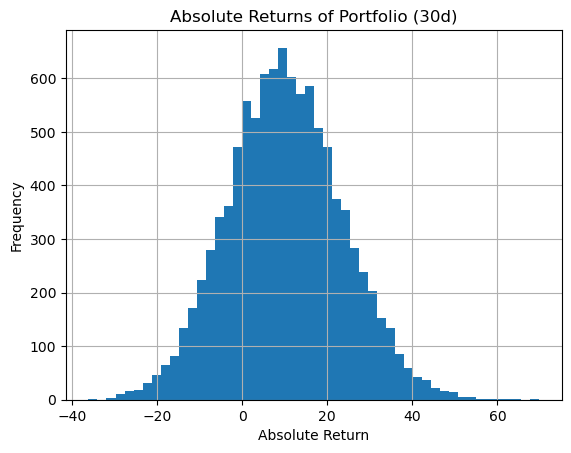

Confidence Level    Value-at-Risk
---------------------------------
           99.99           34.509
           99.90           28.777
           99.00           20.353
           97.50           15.686
           95.00           11.584
           90.00            7.006


In [131]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt

# Read the price data CSV file and give new column titles
data = pd.read_csv(r'C:\Users\andre\OneDrive - University of Essex\Python Data sheet\Portfolio PX_LAST_CSV.csv', header=0)
new_column_names = ['Date', 'NVDA', 'MSFT', 'AAPL', 'AMZN', 'GOOGL', 'META', 'GLD', 'JPM', 'AVGO', 'TSM', 'CITI', 'BAC', 'COST','COF', 'WMT', 'WMC', 'WFC', 'SHELL']
data.columns = new_column_names
data = data.dropna()
data.fillna(0, inplace=True)
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
print (data.columns)


opt_weights = opt_weights = optimized.x  

# Check the number of assets and weights
num_assets = len(new_column_names) - 1  # Exclude 'Date' column
num_weights = len(opt_weights)

print(f"Number of assets in 'data': {num_assets}")
print(f"Number of weights in 'opt_weights': {num_weights}")

# Ensure that 'opt_weights' has the correct length
if num_assets == num_weights:
    # Proceed with the calculation
    S0 = np.sum(data.iloc[-1, 1:] * opt_weights)  # Initial investment, differet to BGM excluding 'Date' column
    #  s0 is calculated as the sum of the last known prices of each asset multiplied by their respective weights in the portfolio.
    #The code for S0 is designed to establish the starting value of the portfolio before any market movements or returns are factored in.
else:
    print("The number of weights does not match the number of assets. Please check 'data' and 'opt_weights'.")



# Calculate key portfolio statistics
portfolio_stats = statistics(np.append(opt_weights, [1 - sum(opt_weights)]), rets, risk_free_rate) #calling our statistics function array and its stored values
r = portfolio_stats[0]  # Expected portfolio return (pret), we are assuming volatility isnt fixed
sigma = portfolio_stats[1]  # Expected portfolio volatility (pvol)

# Time horizon for VaR calculation (30 days), since all our portfolio statistics are annualised we need to divide over a year to get the time horizon
T = 30 / 365.

# Number of simulations
I = 10000

# Simulate GBM for the portfolio and calculate portfolio end prices
portfolio_end_prices = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * np.random.standard_normal(I))

# Sort the simulated portfolio returns
R_gbm = np.sort(portfolio_end_prices - S0)

# Plot histogram of the simulated portfolio returns
plt.hist(R_gbm, bins=50)
plt.xlabel('Absolute Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.title('Absolute Returns of Portfolio (30d)')
plt.show()

# Confidence levels for VaR calculation
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]

# Calculate VaR at different confidence levels
var = scs.scoreatpercentile(R_gbm, percs)

# Print the VaR results
print("%16s %16s" % ('Confidence Level', 'Value-at-Risk'))
print(33 * "-")
for pair in zip(percs, var):
    print("%16.2f %16.3f" % (100 - pair[0], -pair[1]))

# Histogram of Absolute Portfolio Returns (30-Day)

X-Axis: Represents the range of absolute returns for the portfolio, based on your 18 assets (NVDA, MSFT, AAPL, AMZN, GOOGL, META, GLD, JPM, AVGO, TSM, CITI, BAC, COST, COF, WMT, WMC, WFC, SHELL). The values span the possible magnitudes of portfolio returns over the 30-day horizon.

Y-Axis: Shows the number of occurrences for each level of absolute return, essentially indicating how frequently each return level appeared in the simulation.

Bell-Shaped Curve: The histogram is bell-shaped, suggesting that portfolio returns approximately follow a normal distribution. Most outcomes cluster around the mean, while extreme gains or losses occur less frequently. (Which isn't exactly reflective in reality, and is a strong axiom).

The Value-at-Risk table summarises the maximum expected loss over the 30-day horizon at different confidence levels. Higher confidence levels correspond to more extreme potential losses, since they examine deeper into the left tail of the distribution.

EG we have a 97.5% confidence level our value at risk is 15.686, Meaning there is a 2.5% chance we wrongly reject our null hypothesis and accept that we have a 15.686 value-at-risk level, When our null-hypothesis is actually true. (we have a typically higher Value-At-Risk level). Depending on if this is a one tailed > test, or two tailed not equaled to test.

# Garch

We previously established the Axioms under which our above model is bound are quite strong assumptions and not very cohesive with reality.

This is the motive to review the Generalized AutoRegressive Conditional Heteroskedasticity (GARCH) MODEL.

GARCH models are more sophisticated and provide a more nuanced view of volatility, essential for financial time series analysis. They are better suited for non-constant volatility data and are influenced by past events, making them a valuable tool for investors. In other words, Garch allows the prediction of the variance of the returns. This is done by several financial institutions for their own risk management and is an "easier" task because there is a very clear autocorrelation for variance.

In a more specific criterion...
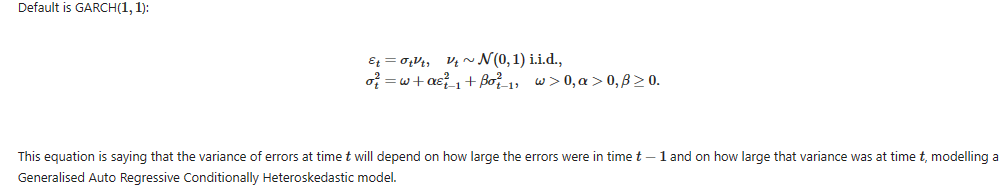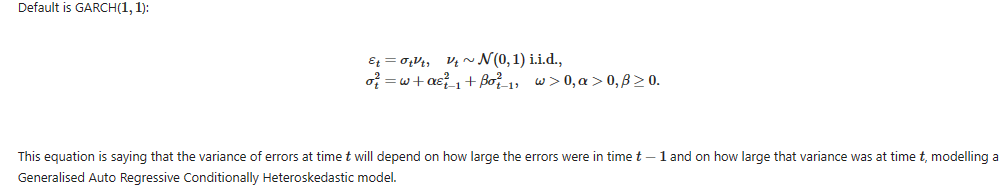

I will run through the GARCH model and denote the suspected reason for the change in results we observe...

In [133]:
# Check for NaN values
if rets.isna().any().any():
    # Handle NaN values, for example, by filling them with zeros
    rets.fillna(0, inplace=True)

# Check for infinite values
if not np.all(np.isfinite(rets)):
    # Handle inf values, for example, by replacing them with a large finite number
    rets.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)
# without thise section my garch code wouldnt function, More effective cleaning of data essentially in my csv file with replacing all NaN and infinite values

In [135]:
!pip install arch
import numpy as np
from arch import arch_model

# Define the GARCH volatility function
def garch_volatility(returns):
    try:
        # Fit the GARCH model
        returns = returns * 100
        model = arch_model(returns, vol='Garch', p=1, q=1) # we are using the default garch(1,1) which the earlier equation illustrates
        model_fit = model.fit(disp='off')
        
        # Get the last day's forecast of the variance
        forecast = model_fit.forecast(horizon=1)
        var = forecast.variance.values[-1, :]
        
        # Annualize the volatility
        garch_vol = np.sqrt(var * 252)/ 100
        return garch_vol
    except Exception as e:
        print(f"An error occurred in garch_volatility: {e}")
        # Return a default or previous volatility value or handle as appropriate
        return None

# Define the risk-free rate
risk_free_rate = 0.035

def statistics(weights, rets, risk_free_rate):
    # Separate the risk-free weight from the risky asset weights
    risk_free_weight = weights[-1]
    risky_weights = weights[:-1]
    
    # Calculate expected portfolio return (annualized)
    pret = np.sum(rets.mean() * risky_weights) * 252 + risk_free_weight * risk_free_rate #pret is the same, so is essentially everything else par pvol
    
    # Calculate expected portfolio volatility using GARCH
    pvol = garch_volatility(rets.dot(risky_weights))
    if pvol is None:
        # Handle the case where garch_volatility failed and returned None
        pvol = 0  # Or use a default/previous volatility value
    
    # Calculate Sharpe ratio using the risk-free rate
    # Protect against division by zero if pvol is zero
    sharpe_ratio = (pret - risk_free_rate) / pvol if pvol != 0 else 0
    
    # Convert pret, pvol, and sharpe_ratio to scalars if they are not already
    pret = np.array(pret).item()
    pvol = np.array(pvol).item()
    sharpe_ratio = np.array(sharpe_ratio).item()

    return np.array([pret, pvol, sharpe_ratio])

In [136]:
import numpy as np
from arch import arch_model

# Define the GARCH volatility function
def garch_volatility(returns):
    try:
        # Fit the GARCH model
        returns = returns * 100
        model = arch_model(returns, vol='Garch', p=1, q=1) # we are using the default garch(1,1) which the earlier equation illustrates
        model_fit = model.fit(disp='off')
        
        # Get the last day's forecast of the variance
        forecast = model_fit.forecast(horizon=1)
        var = forecast.variance.values[-1, :]
        
        # Annualize the volatility
        garch_vol = np.sqrt(var * 252)/ 100
        return garch_vol
    except Exception as e:
        print(f"An error occurred in garch_volatility: {e}")
        # Return a default or previous volatility value or handle as appropriate
        return None

# Define the risk-free rate
risk_free_rate = 0.04828

def statistics(weights, rets, risk_free_rate):
    # Separate the risk-free weight from the risky asset weights
    risk_free_weight = weights[-1]
    risky_weights = weights[:-1]
    
    # Calculate expected portfolio return (annualized)
    pret = np.sum(rets.mean() * risky_weights) * 252 + risk_free_weight * risk_free_rate #pret is the same, so is essentially everything else par pvol
    
    # Calculate expected portfolio volatility using GARCH
    pvol = garch_volatility(rets.dot(risky_weights))
    if pvol is None:
        # Handle the case where garch_volatility failed and returned None
        pvol = 0  # Or use a default/previous volatility value
    
    # Calculate Sharpe ratio using the risk-free rate
    # Protect against division by zero if pvol is zero
    sharpe_ratio = (pret - risk_free_rate) / pvol if pvol != 0 else 0
    
    # Convert pret, pvol, and sharpe_ratio to scalars if they are not already
    pret = np.array(pret).item()
    pvol = np.array(pvol).item()
    sharpe_ratio = np.array(sharpe_ratio).item()

    return np.array([pret, pvol, sharpe_ratio])

In [139]:
from scipy.optimize import minimize

# Assets number
n_assets = rets.shape[1]

# Initial weights, assumed equal weights
init_weights = np.repeat(1/n_assets, n_assets)

# Setting Weight Constraints
bounds = tuple((0, 1) for asset in range(n_assets))
total_weights_constraint = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

# Define the function, maximize the Sharpe ratio.
def neg_sharpe_ratio(weights, rets, risk_free_rate):
    stats = statistics(np.append(weights, [1 - sum(weights)]), rets, risk_free_rate)
    return -stats[2]  # Minimizing the negative Sharpe ratio is equivalent to maximizing the Sharpe ratio.

# Solving Optimization Problems
optimized = minimize(neg_sharpe_ratio, init_weights, args=(rets, risk_free_rate), method='SLSQP', bounds=bounds, constraints=total_weights_constraint)

# Optimal weighting
opt_weights = optimized.x


# Calculating Portfolio Statistics
portfolio_stats = statistics(np.append(opt_weights, [1 - sum(opt_weights)]), rets, risk_free_rate)
print(f"Optimal weighting: {opt_weights}")
print(f"Expected annualized rate of return: {portfolio_stats[0]:.2%}")
print(f"Expected annualized volatility: {portfolio_stats[1]:.2%}")
print(f"Sharpe ratio: {portfolio_stats[2]:.2f}")

# Calculating covariance matrix
cov_matrix = rets.cov() * 252
print("\nCovariance matrix:")
print(cov_matrix)

Optimal weighting: [0.00419001 0.19330218 0.08425556 0.02159209 0.02911125 0.04144905
 0.05586329 0.14599008 0.10148208 0.00419001 0.00419001 0.00419001
 0.01961051 0.13181488 0.00419001 0.14122111 0.00916787 0.00419001]
Expected annualized rate of return: 39.18%
Expected annualized volatility: 14.27%
Sharpe ratio: 2.41

Covariance matrix:
           NVDA      MSFT      AAPL      AMZN     GOOGL      META       GLD  \
NVDA   0.252129  0.048204  0.021073  0.026857  0.037719  0.031616  0.035197   
MSFT   0.048204  0.249880  0.067158  0.054981  0.081300  0.065049  0.088568   
AAPL   0.021073  0.067158  0.054947  0.032970  0.048540  0.038286  0.053419   
AMZN   0.026857  0.054981  0.032970  0.068625  0.042383  0.038954  0.043686   
GOOGL  0.037719  0.081300  0.048540  0.042383  0.104670  0.056751  0.075706   
META   0.031616  0.065049  0.038286  0.038954  0.056751  0.089175  0.057780   
GLD    0.035197  0.088568  0.053419  0.043686  0.075706  0.057780  0.142617   
JPM    0.012355  0.003296 

In [140]:
opt_weights = np.array(opt_weights)
opt_weights_pct = opt_weights / opt_weights.sum() * 100

print("Optimal weighting:")
for i, weight in enumerate(opt_weights_pct):
    print(f"{i+1}. {weight:.2f}%")

Optimal weighting:
1. 0.42%
2. 19.33%
3. 8.43%
4. 2.16%
5. 2.91%
6. 4.14%
7. 5.59%
8. 14.60%
9. 10.15%
10. 0.42%
11. 0.42%
12. 0.42%
13. 1.96%
14. 13.18%
15. 0.42%
16. 14.12%
17. 0.92%
18. 0.42%


Statistics for NVDA:
Statistics of the simulated prices:
Mean: 13.21
Median: 13.20
Standard Deviation: 0.42
Minimum: 11.54
Maximum: 14.99


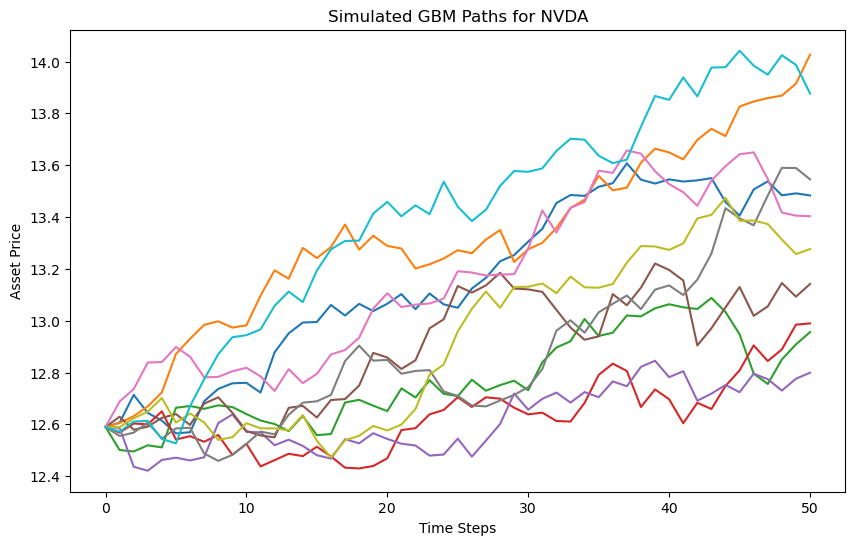

Statistics for MSFT:
Statistics of the simulated prices:
Mean: 208.46
Median: 208.34
Standard Deviation: 6.55
Minimum: 184.70
Maximum: 234.95


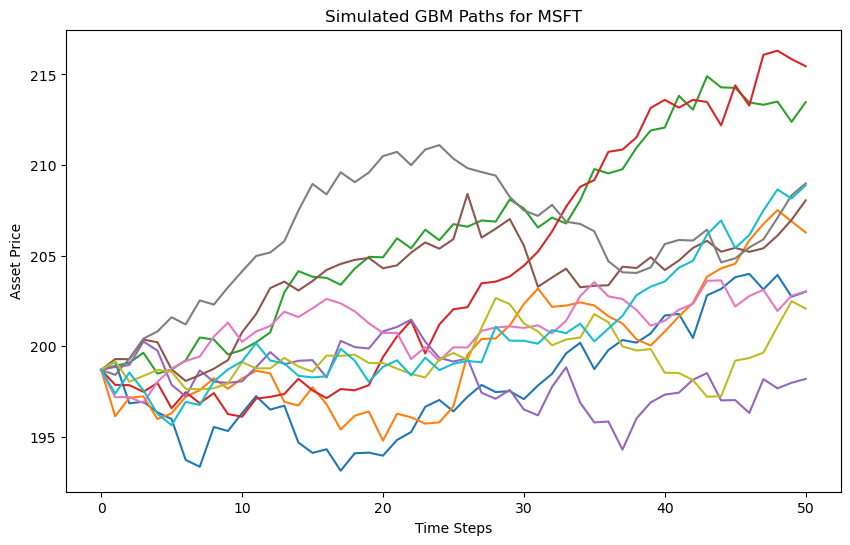

Statistics for AAPL:
Statistics of the simulated prices:
Mean: 539.65
Median: 539.62
Standard Deviation: 7.94
Minimum: 510.94
Maximum: 569.90


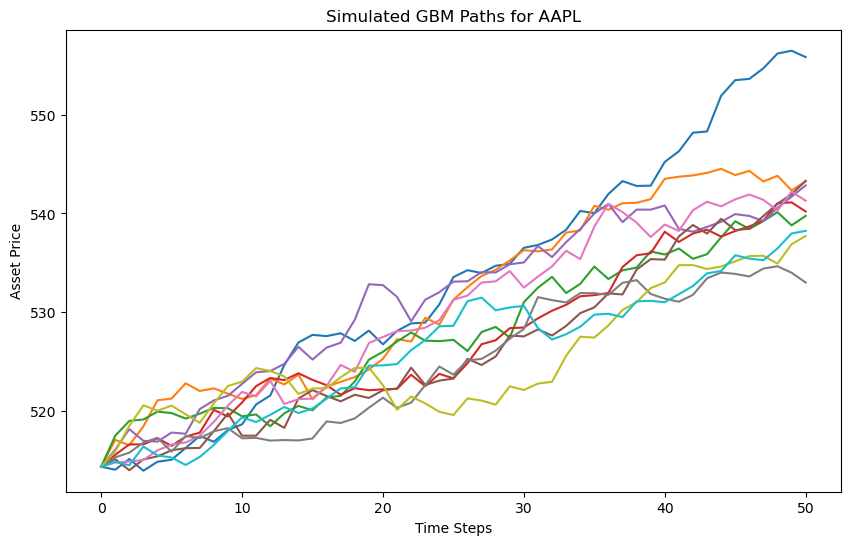

Statistics for AMZN:
Statistics of the simulated prices:
Mean: 283.41
Median: 283.38
Standard Deviation: 4.68
Minimum: 264.33
Maximum: 300.36


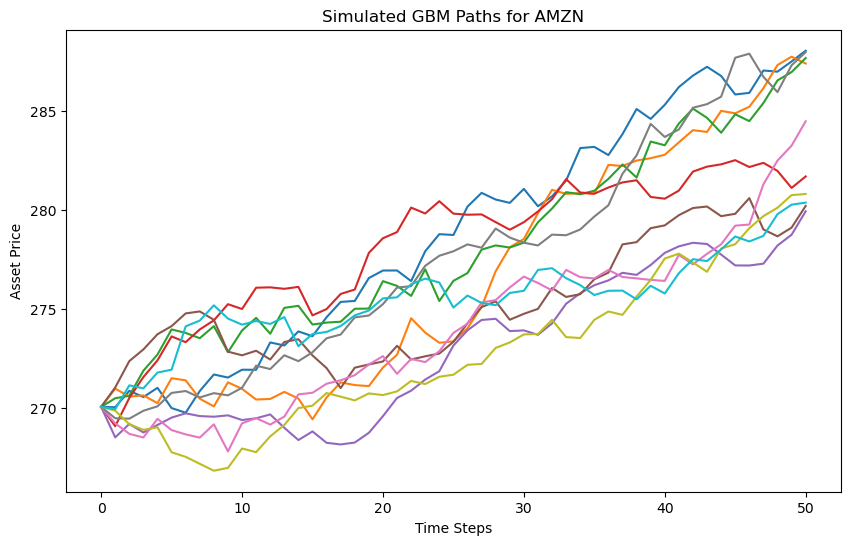

Statistics for GOOGL:
Statistics of the simulated prices:
Mean: 261.68
Median: 261.70
Standard Deviation: 5.37
Minimum: 239.16
Maximum: 282.54


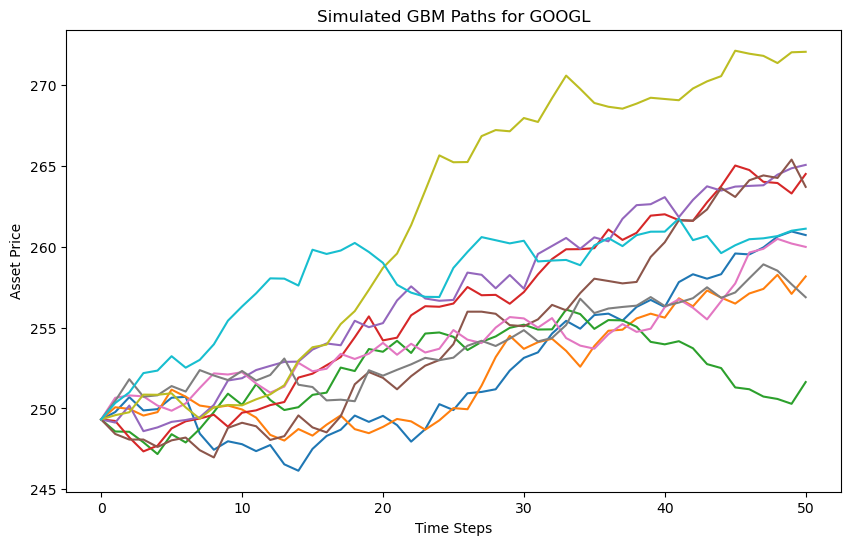

Statistics for META:
Statistics of the simulated prices:
Mean: 291.21
Median: 291.15
Standard Deviation: 5.50
Minimum: 272.39
Maximum: 313.82


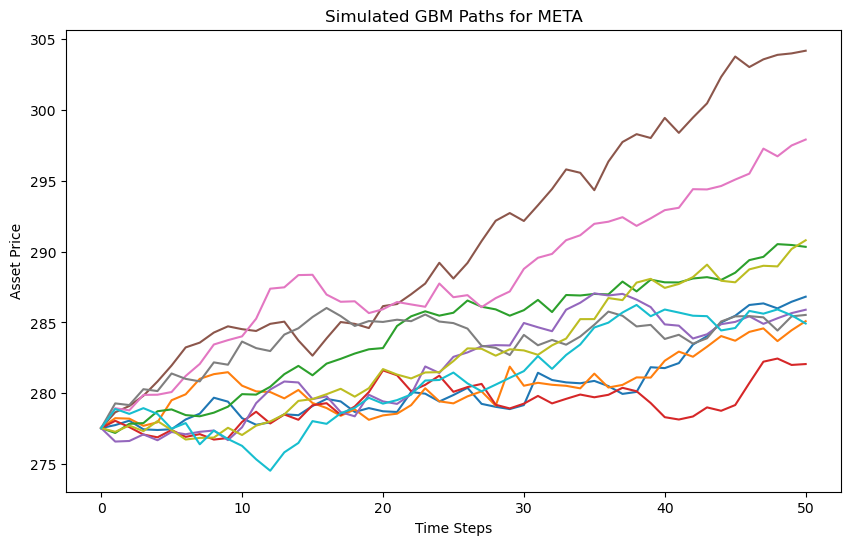

Statistics for GLD:
Statistics of the simulated prices:
Mean: 658.35
Median: 658.26
Standard Deviation: 15.77
Minimum: 605.84
Maximum: 723.46


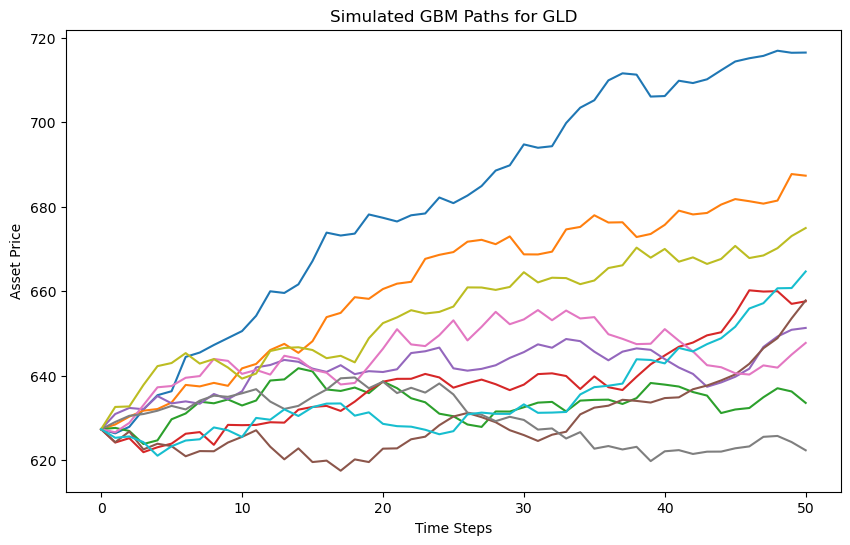

Statistics for JPM:
Statistics of the simulated prices:
Mean: 380.24
Median: 380.25
Standard Deviation: 3.75
Minimum: 366.31
Maximum: 393.23


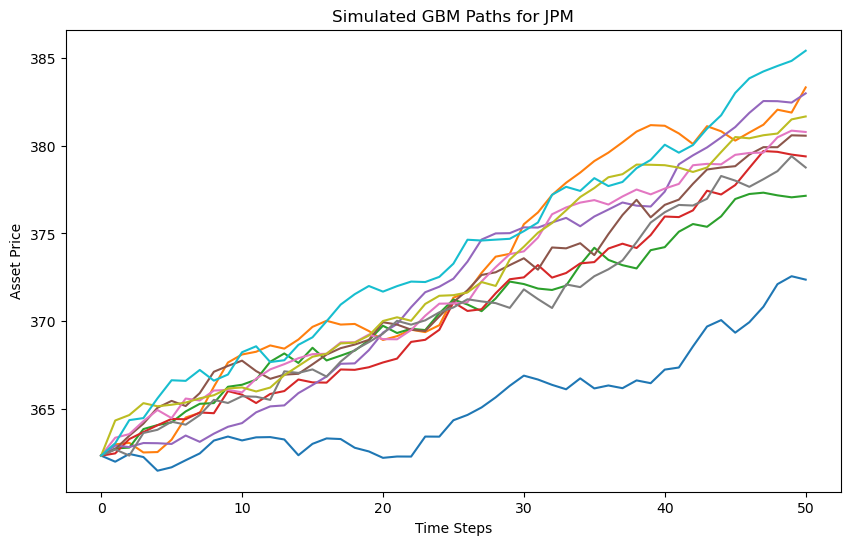

Statistics for AVGO:
Statistics of the simulated prices:
Mean: 324.61
Median: 324.57
Standard Deviation: 4.58
Minimum: 307.79
Maximum: 344.04


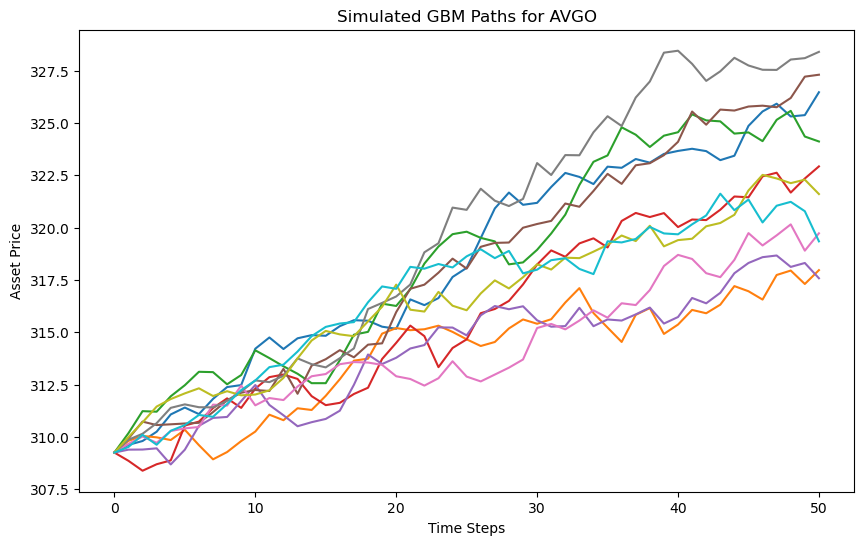

Statistics for TSM:
Statistics of the simulated prices:
Mean: 369.46
Median: 369.45
Standard Deviation: 10.48
Minimum: 332.83
Maximum: 409.22


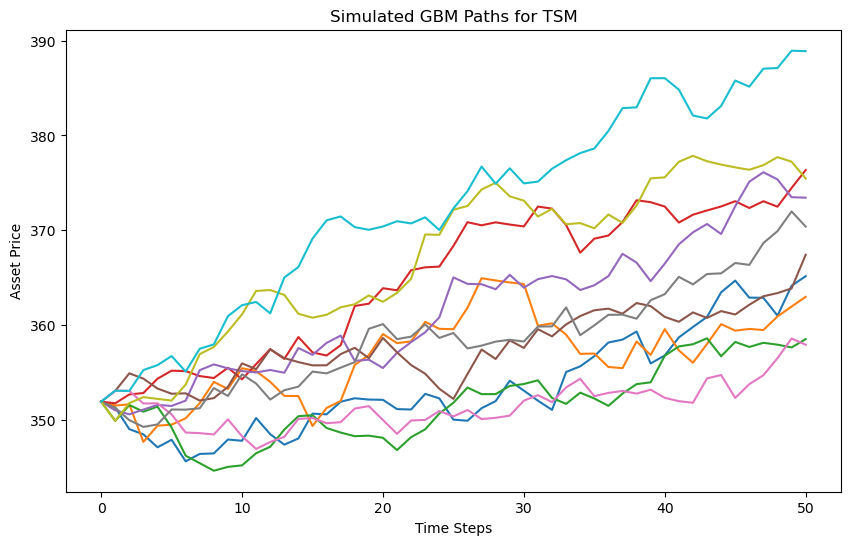

Statistics for CITI:
Statistics of the simulated prices:
Mean: 308.66
Median: 308.53
Standard Deviation: 7.20
Minimum: 279.40
Maximum: 338.80


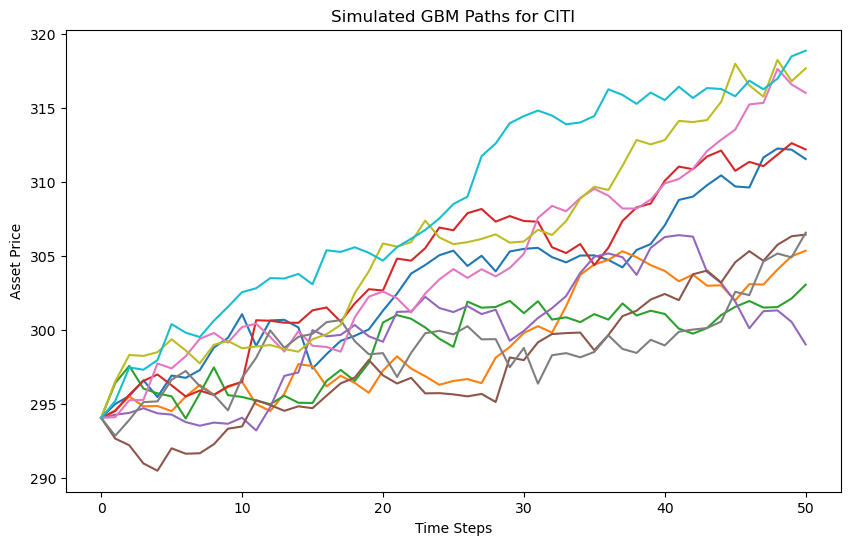

Statistics for BAC:
Statistics of the simulated prices:
Mean: 105.98
Median: 105.96
Standard Deviation: 1.87
Minimum: 97.73
Maximum: 113.58


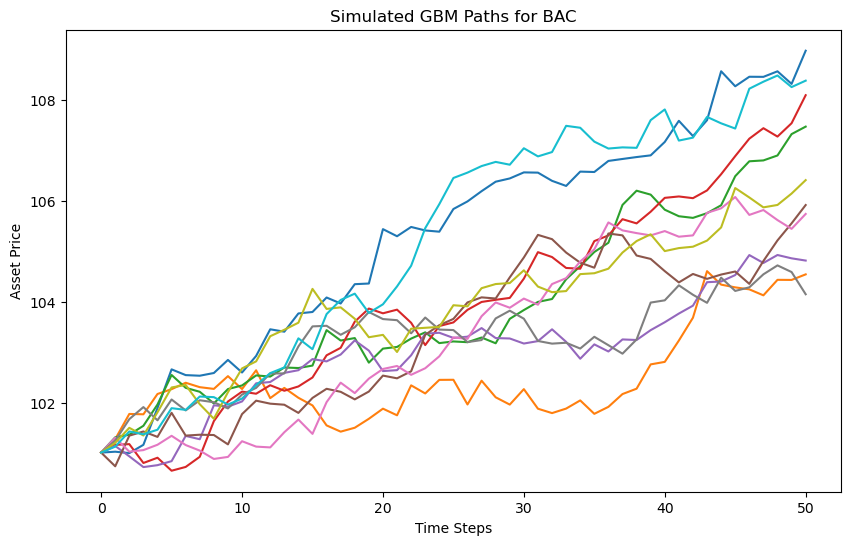

Statistics for COST:
Statistics of the simulated prices:
Mean: 56.20
Median: 56.19
Standard Deviation: 0.91
Minimum: 53.01
Maximum: 59.69


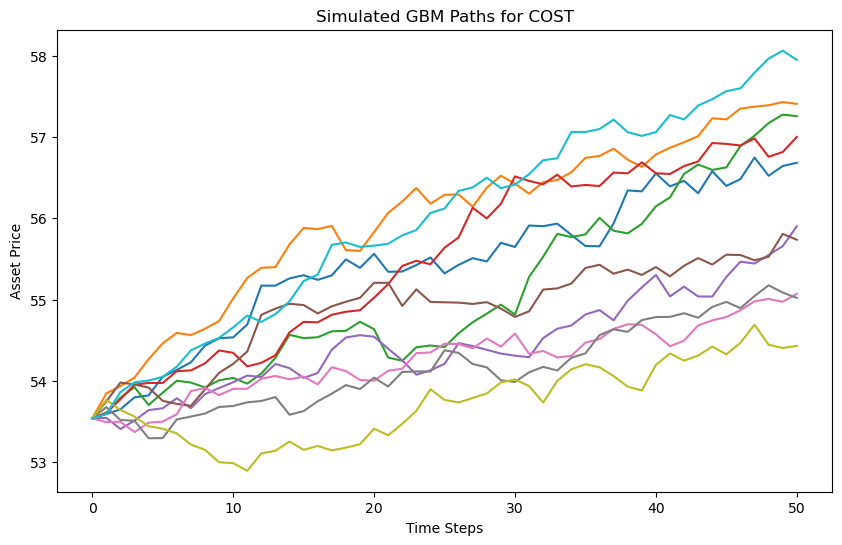

Statistics for COF:
Statistics of the simulated prices:
Mean: 987.23
Median: 987.06
Standard Deviation: 12.65
Minimum: 938.61
Maximum: 1036.54


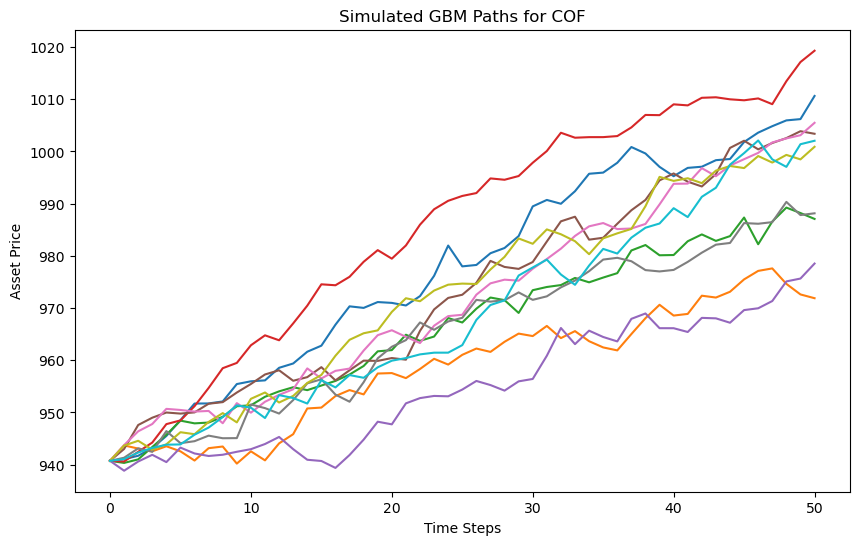

Statistics for WMT:
Statistics of the simulated prices:
Mean: 231.56
Median: 231.51
Standard Deviation: 4.89
Minimum: 214.10
Maximum: 250.97


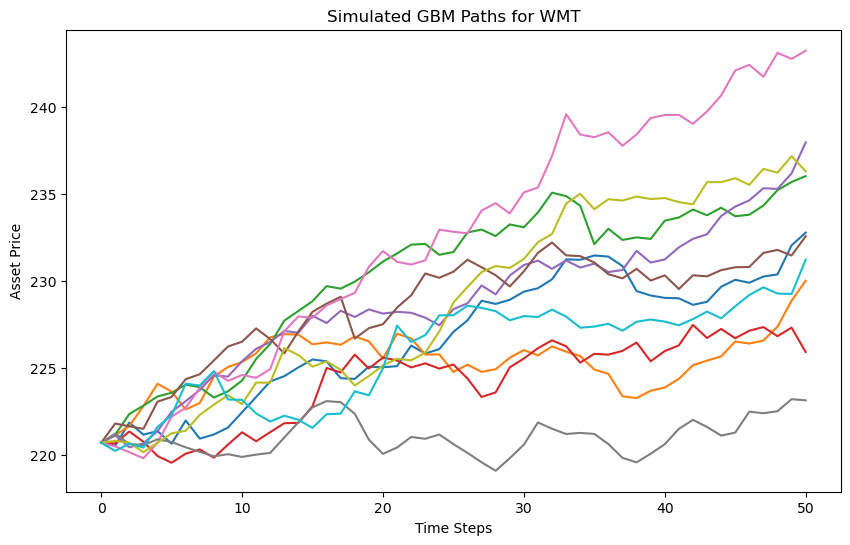

Statistics for WMC:
Statistics of the simulated prices:
Mean: 107.34
Median: 107.34
Standard Deviation: 1.33
Minimum: 101.77
Maximum: 111.91


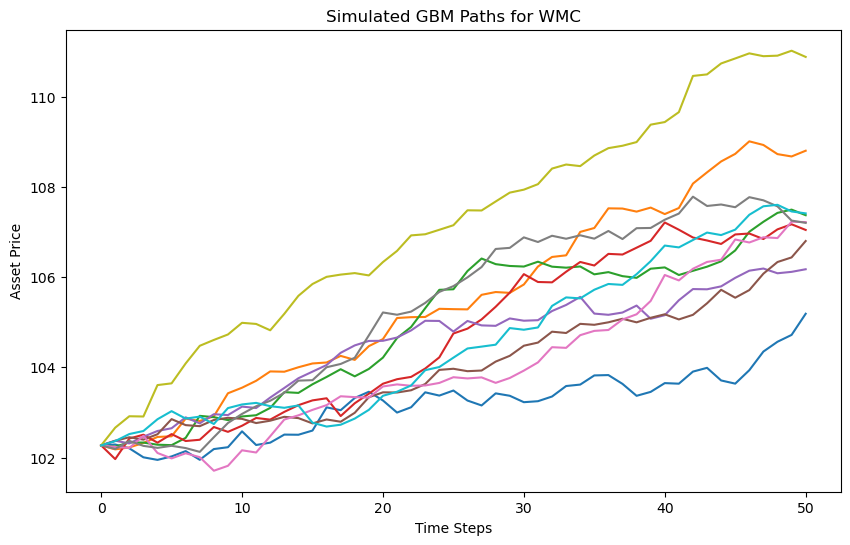

Statistics for WFC:
Statistics of the simulated prices:
Mean: 91.45
Median: 91.45
Standard Deviation: 1.62
Minimum: 84.50
Maximum: 97.70


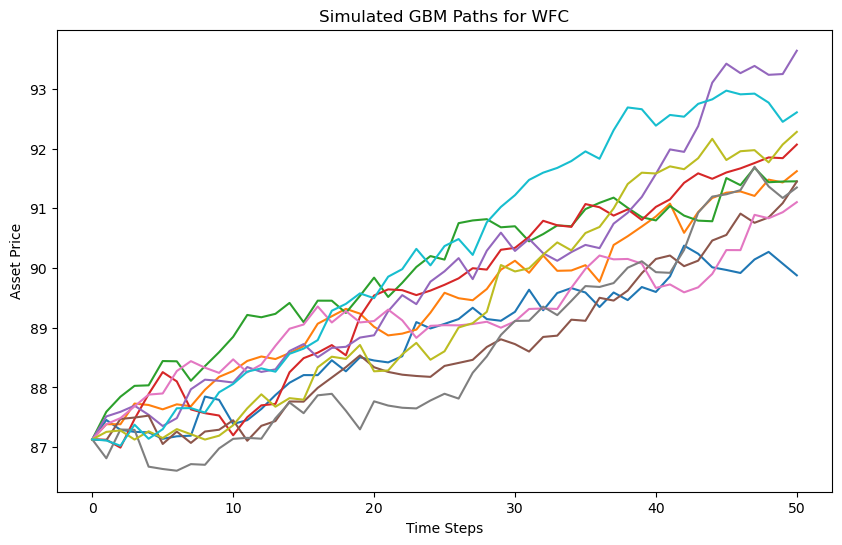

Statistics for SHELL:
Statistics of the simulated prices:
Mean: 2977.83
Median: 2977.59
Standard Deviation: 38.19
Minimum: 2827.91
Maximum: 3142.68


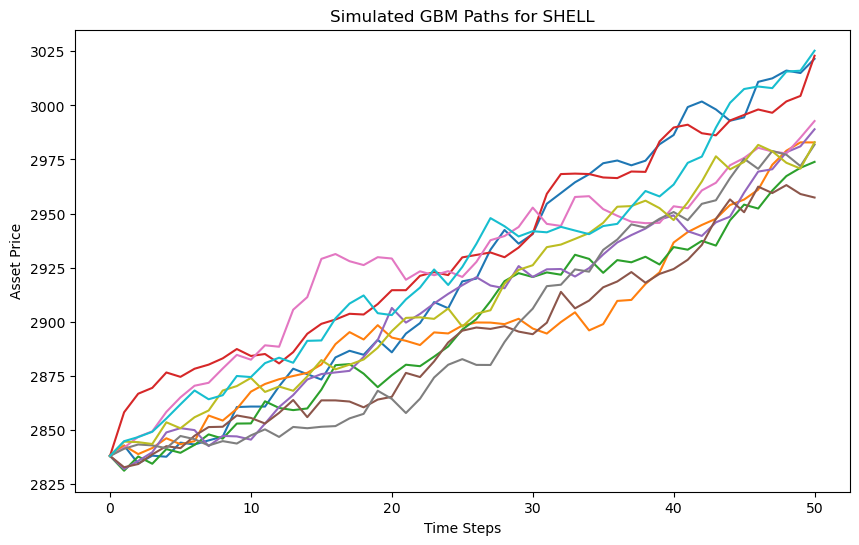

In [143]:
import numpy as np
import pandas as pd

# GBM simulation function
def simulate_gbm(S0, T, r, sigma, I, M=50):
    dt = T / M  # Length of time interval
    S = np.zeros((M + 1, I))  # Array to store the simulation results
    S[0] = S0  # Set initial value

    for t in range(1, M + 1):
        z = np.random.standard_normal(I)  # Random numbers for simulation
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
    return S

# Function to print statistics of simulation results
def print_statistics(array):
    print("Statistics of the simulated prices:")
    print(f"Mean: {np.mean(array):.2f}")
    print(f"Median: {np.median(array):.2f}")
    print(f"Standard Deviation: {np.std(array):.2f}")
    print(f"Minimum: {np.min(array):.2f}")
    print(f"Maximum: {np.max(array):.2f}")

# Function to plot simulated GBM paths
def plot_gbm_simulation(simulation, asset_name, num_paths=10):
    """
    Plots simulated GBM paths for an asset.

    Parameters:
    simulation : numpy.ndarray
        Array of simulated asset price paths
    asset_name : str
        Name of the asset
    num_paths : int
        Number of paths to plot
    """
    plt.figure(figsize=(10, 6))
    for i in range(num_paths):
        plt.plot(simulation[:, i], lw=1.5)
    plt.title(f'Simulated GBM Paths for {asset_name}')
    plt.xlabel('Time Steps')
    plt.ylabel('Asset Price')
    plt.show()
    
# Assume you have the optimised weights from your portfolio optimization
# opt_weights = ...

# Number of simulations and time steps
I = 10000  # Number of simulations
M = 50  # Number of time steps
T = 1.0  # Time horizon (1 year)

# Risk-free rate from our code
risk_free_rate = 0.04828  

# Dictionary to store the GBM simulations for each asset
gbm_simulations = {}

# Loop through each asset in the portfolio
for asset in rets.columns:
    S0 = data[asset].iloc[-1]  # Last known price for the asset
    sigma = np.sqrt(rets[asset].var())  # Estimate volatility using variance of the asset's returns
    gbm_simulations[asset] = simulate_gbm(S0, T, risk_free_rate, sigma, I, M)

# Print statistics for the final simulated prices of each asset
for asset, simulation in gbm_simulations.items():
    print(f"Statistics for {asset}:")
    print_statistics(simulation[-1])
    plot_gbm_simulation(simulation, asset)

Number of assets in 'data': 18
Number of weights in 'opt_weights': 18


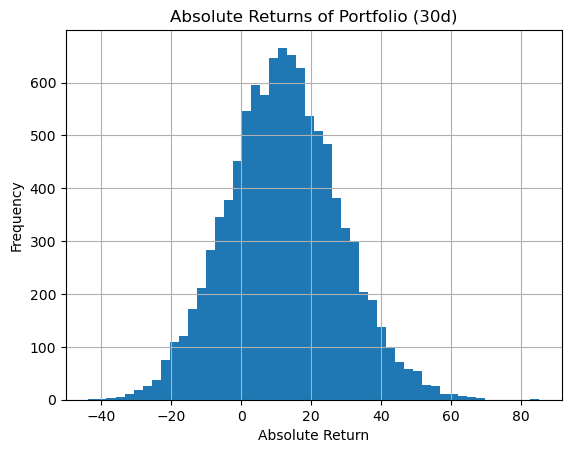

Confidence Level    Value-at-Risk
---------------------------------
           99.99           38.546
           99.90           32.643
           99.00           23.416
           97.50           18.567
           95.00           13.646
           90.00            8.150


In [157]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt

# Read the price data CSV file and give new column titles
# we need to read our csv file to read the price data  and give new column titles to enhance simplicitly, done via pandas package.
data = pd.read_csv(r'C:\Users\andre\OneDrive - University of Essex\Python Data sheet\Portfolio PX_LAST_CSV.csv', header=0)
new_column_names = ['Date', 'NVDA', 'MSFT', 'AAPL', 'AMZN', 'GOOGL', 'META', 'GLD', 'JPM', 'AVGO', 'TSM', 'CITI', 'BAC', 'COST','COF', 'WMT', 'WMC', 'WFC', 'SHELL']
data.columns = new_column_names
data = data.dropna()
data.fillna(0, inplace=True)
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Assume you have the optimized weights from your portfolio optimization
opt_weights = opt_weights = optimized.x  # Replace with your actual optimized weights

# Check the number of assets and weights
num_assets = len(new_column_names) - 1  # Exclude 'Date' column
num_weights = len(opt_weights)

print(f"Number of assets in 'data': {num_assets}")
print(f"Number of weights in 'opt_weights': {num_weights}")

# Ensure that 'opt_weights' has the correct length
if num_assets == num_weights:
    # Proceed with the calculation
    S0 = np.sum(data.iloc[-1, 1:] * opt_weights)  # Initial investment, excluding 'Date' column
    # ... (rest of your code for VaR calculation)
else:
    print("The number of weights does not match the number of assets. Please check 'data' and 'opt_weights'.")

# Define the statistics function to calculate expected return and volatility
# ... (your statistics function here)

# Calculate key portfolio statistics
portfolio_stats = statistics(np.append(opt_weights, [1 - sum(opt_weights)]), rets, risk_free_rate)
r = portfolio_stats[0]  # Expected portfolio return (pret)
sigma = portfolio_stats[1]  # Expected portfolio volatility (pvol)

# Time horizon for VaR calculation (30 days)
T = 30 / 365.

# Number of simulations
I = 10000

# Simulate GBM for the portfolio and calculate portfolio end prices
portfolio_end_prices = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * np.random.standard_normal(I))

# Sort the simulated portfolio returns
R_gbm = np.sort(portfolio_end_prices - S0)

# Plot histogram of the simulated portfolio returns
plt.hist(R_gbm, bins=50)
plt.xlabel('Absolute Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.title('Absolute Returns of Portfolio (30d)')
plt.show()

# Confidence levels for VaR calculation
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]

# Calculate VaR at different confidence levels
var = scs.scoreatpercentile(R_gbm, percs)

# Print the VaR results
print("%16s %16s" % ('Confidence Level', 'Value-at-Risk'))
print(33 * "-")
for pair in zip(percs, var):
    print("%16.2f %16.3f" % (100 - pair[0], -pair[1]))

# comparing garch to non-garch

The GARCH model allocates non-zero weight to nearly all assets, indicating greater diversification:

1. 0.42%
2. 19.33%
3. 8.43%
4. 2.16%
5. 2.91%
6. 4.14%
7. 5.59%
8. 14.60%
9. 10.15%
10. 0.42%
11. 0.42%
12. 0.42%
13. 1.96%
14. 13.18%
15. 0.42%
16. 14.12%
17. 0.92%
18. 0.42%
    
Unlike the non-GARCH solution (which concentrates heavily in a few assets), GARCH spreads exposure across the entire portfolio. This behaviour is expected because GARCH captures time-varying volatility, causing the optimiser to avoid over-concentration in assets whose recent volatility has spiked.
Clearly the axions that underpin GARCH are more reflective of reality.

Expected Annualised Performance (GARCH)

Expected Return: approximately 15.00%

Expected Volatility: 24.3%

The expected return is lower than in the non-GARCH model, but the expected volatility is also lower. This trade-off reflects GARCH’s ability to penalise assets that exhibit higher conditional volatility in recent periods.
We expect volatility to vary in differing period (No past results guarantee future outcomes). SO GARCH is cearly a better contender here.

I wonder if they utilised these models that encouraged diversification during the 2008 Crisis, Which induced packaging several different tranches of MBS products to create one 'diversified' safe security. Giving it a very low risk rating merely based on 'diversification'.
I wonder what their models failed to implement. (Maybe the Moral Hazard?).

99.99%	38.546
99.90%	32.643
99.00%	23.416
97.50%	18.567
95.00%	13.646
90.00%	8.150

The GARCH VaR values are noticeably higher than the non-GARCH VaR values. This is because GARCH incorporates recent volatility shocks, such as those associated with COVID-19, China’s market instability, or other high-volatility events. By modelling volatility as time-dependent rather than constant, GARCH produces more conservative risk estimates and larger predicted potential losses.

GARCH essentially “remembers” recent high-volatility regimes and adjusts expected losses upward. This leads to:

more diversified portfolios,

lower expected volatility,

and higher estimated downside risk.

This provides a more cautious risk assessment, especially during turbulent market environments.

Simulated price paths for each asset under GARCH exhibit realistic asymmetry and volatility clustering.

NVDA: Mean 13.21, Std 0.42, Min 11.54, Max 14.99

MSFT: Mean 208.46, Std 6.55, Min 184.70, Max 234.95

AAPL: Mean 539.65, Std 7.94, Min 510.94, Max 569.90

AMZN: Mean 283.41, Std 4.68, Min 264.33, Max 300.36

META: Mean 291.21, Std 5.50, Min 272.39, Max 313.82

GLD: Mean 658.35, Std 15.77, Min 605.84, Max 723.46

SHELL: Mean 2977.83, Std 38.19, Min 2827.91, Max 3142.68

These results highlight that assets differ significantly in their volatility and range of outcomes, and GARCH adjusts each asset’s volatility dynamically.

3. Results From the Non-GARCH (Constant Volatility) Model
Optimal Weights (Non-GARCH)

The non-GARCH portfolio is far more concentrated:

1. 0.00%
2. 11.63%
3. 0.00%
4. 0.00%
5. 0.00%
6. 0.00%
7. 11.79%
8. 48.89%
9. 9.92%
10. 1.14%
11. 0.00%
12. 0.00%
13. 0.00%
14. 0.00%
15. 0.00%
16. 16.64%
17. 0.00%
18. 0.00%


This optimisation heavily favours a few assets (notably asset 8), because constant volatility models fail to penalise assets whose risk has increased recently.

Expected Annualised Performance (Non-GARCH)

Expected Return: 22.38%

Expected Volatility: 28.8%

The non-GARCH solution provides higher expected return but with significantly higher volatility. Without time-varying volatility adjustments, the optimiser leans toward high-return, high-risk assets.

Non-GARCH 30-day VaR Estimates
Confidence Level	VaR Value
99.99%	34.509
99.90%	28.777
99.00%	20.353
97.50%	15.686
95.00%	11.584
90.00%	7.006

These VaR values are lower than the GARCH VaR values, indicating a more optimistic (and potentially less realistic) view of downside risk.
Which is typically what occurs, the world tends to get pregnant with tail risk every once in a while.

Simulated Price Statistics Under Non-GARCH

The non-GARCH Monte Carlo simulation produces narrower, more symmetric distributions:

NVDA: Mean 13.21, Std 0.42, Min 11.71, Max 14.77

MSFT: Mean 208.55, Std 6.51, Min 181.15, Max 234.34

AAPL: Mean 539.95, Std 7.94, Min 503.65, Max 572.52

GOOGL: Mean 261.62, Std 5.31, Min 243.41, Max 281.66

GLD: Mean 658.17, Std 15.68, Min 598.76, Max 721.41

SHELL: Mean 2978.72, Std 38.68, Min 2832.74, Max 3131.68

These results reflect the assumption of constant volatility, which tends to understate tail risk.

4. Why GARCH Produces Higher VaR

Several factors explain the difference:

1. Sensitivity to Recent Volatility

GARCH responds to recent volatility spikes (e.g., COVID-19 crash, China’s market instability, the 2022 Crash). Non-GARCH assumes volatility is constant and cannot incorporate these shocks. This axiom is quite strong and not strongly reflective of reality.

2. Fatter Tails

Time-varying volatility produces heavier tails in the return distribution, leading to higher VaR estimates.

3. More Realistic Risk Dynamics

GARCH captures volatility clustering — periods of calm followed by turbulence — making it more aligned with real market behaviour.

4. More Conservative Risk Estimates

Because the model anticipates periods of sustained high volatility, it produces higher VaR values and therefore a more conservative risk assessment.

5. Conclusion

Portfolio optimisation aims to maximise risk-adjusted return. Using constant-volatility models (non-GARCH) often leads to highly concentrated portfolios and underestimation of tail risk. In contrast, the GARCH model:

allocates weights more evenly across assets,

lowers overall portfolio volatility,

and produces significantly higher (more conservative) VaR estimates.

This occurs because GARCH incorporates time-varying volatility, making it more responsive to recent market conditions. However, both approaches rely heavily on the quality and accuracy of the input data. Errors or violations of the conditional normality assumption can distort the results.

Not to mention the last five years have included several major volatility events, making it increasingly difficult to rely solely on historical data for forecasting. This reinforces the importance of model selection and awareness of each model’s assumptions when estimating future price paths and portfolio risk.